## Importing the libraries 

In [21]:
import pandas as pd
import numpy as np
import ast
import re
import math
from geopy.geocoders import Nominatim

# libraries for displaying images

from IPython.display import Image 
from IPython.core.display import HTML 
from folium.plugins import FloatImage
import folium 

# plotting library

import matplotlib.pyplot as plt
import seaborn as sns

# Plotly

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
init_notebook_mode(connected=True)
%matplotlib inline

## Reading the cleaned dataset

In [22]:
df = pd.read_csv(r"C:\\users\\bhask\\downloads\\final_df.csv")

In [23]:
dataset = df.copy()
pd.set_option('display.max_columns', None)
df.head(n=5)

name  \
0  AB's - Absolute Barbecues   
1      Cafe Co2 Resto Lounge   
2  Paasha - JW Marriott Pune   
3                I Amsterdam   
4             FC Road Social   

                                            web_link             locality  \
0  https://www.zomato.com/pune/abs-absolute-barbe...            Hinjawadi   
1  https://www.zomato.com/pune/cafe-co2-resto-lou...              Bhugaon   
2  https://www.zomato.com/pune/paasha-jw-marriott...  Senapati Bapat Road   
3  https://www.zomato.com/pune/i-amsterdam-hinjawadi            Hinjawadi   
4  https://www.zomato.com/pune/fc-road-social-shi...        Shivaji Nagar   

                    type  rate  votes  \
0          Casual Dining   4.9   7029   
1  Lounge, Casual Dining   4.6   2578   
2            Fine Dining   4.6   3291   
3     Casual Dining, Bar   4.3    430   
4     Bar, Casual Dining   4.5   2138   

                                            cuisines avg_cost  \
0                 Continental, North Indian, Chinese   ₹1,400   
1  North Indian, Chinese, Continental, Kebab, Sea...   ₹1,500   
2                       North Indian, Kebab, Biryani   ₹2,500   
3            Asian, European, Modern Indian, Italian   ₹1,400   
4  North Indian, Chinese, Biryani, American, Cont...   ₹1,500   

                                    payment  \
0                   Cash and Cards accepted   
1                   Cash and Cards accepted   
2  Cash,Cards and Digital Payments accepted   
3  Cash,Cards and Digital Payments accepted   
4  Cash,Cards and Digital Payments accepted   

                              timing  \
0  12noon – 4:30pm, 6:30pm – 11:30pm   
1                         11am – 4am   
2                   5:30pm – 12:30am   
3                       12noon – 1am   
4                          9am – 1am   

                                             address  delivery  \
0  Shop 206, 2nd Floor, White Square Building, Op...         0   
1                     Near Manas Lake, Bhugaon, Pune         0   
2             JW Marriott, Senapati Bapat Road, Pune         0   
3  Survey 257/1/1A, Near Raj Laxmi Petrol Pump, P...         0   
4  CTS 1183, Unit 101, 1st Floor, Mezzanine Floor...         1   

   table reservation required  free wifi  full bar available  unlimited pizza  \
0                           0          0                   1                0   
1                           0          0                   1                0   
2                           0          0                   1                0   
3                           0          0                   1                0   
4                           0          0                   1                0   

   private dining area available  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0

## Exploratory Data Analysis

How many different restaurants are there in Pune

In [24]:
histo = df.groupby('name')['address'].count()
# Lets take the top 50 restaurants and plot bar graph
histo = histo.sort_values()[-50:]

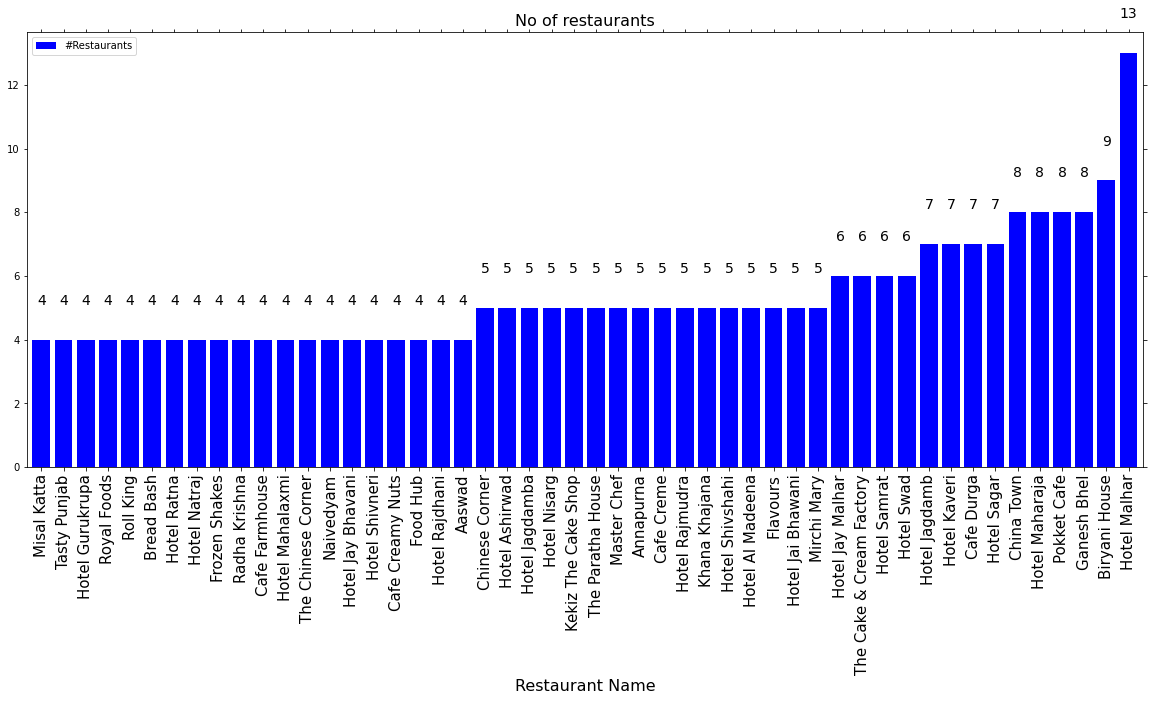

In [25]:
ax = histo.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontsize=14)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Restaurant Name', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

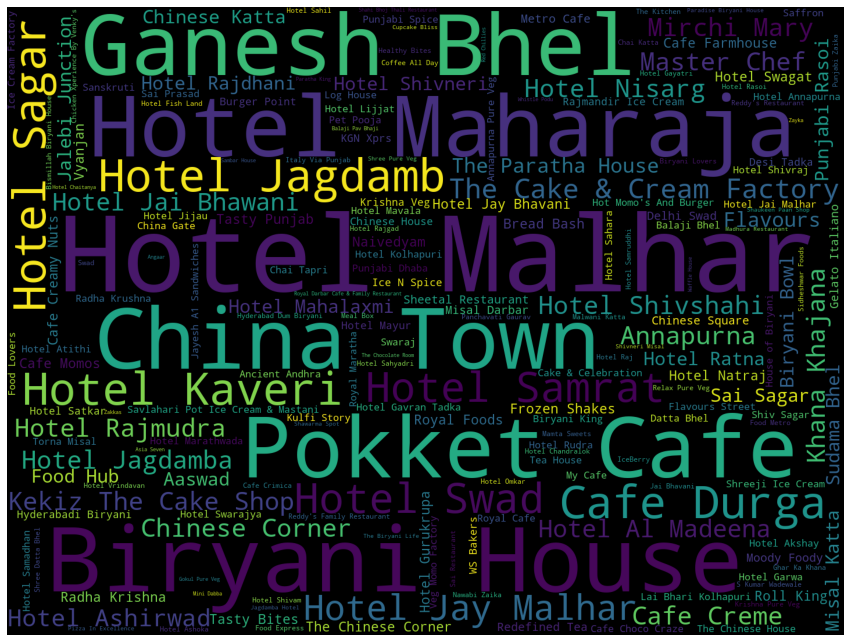

In [26]:
from subprocess import check_output
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df['name'].value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Clearly Biryani House has the most number of restaurants in Bengaluru, followed by Pokket Cafe.



### Delivery Restaurant and Table Book

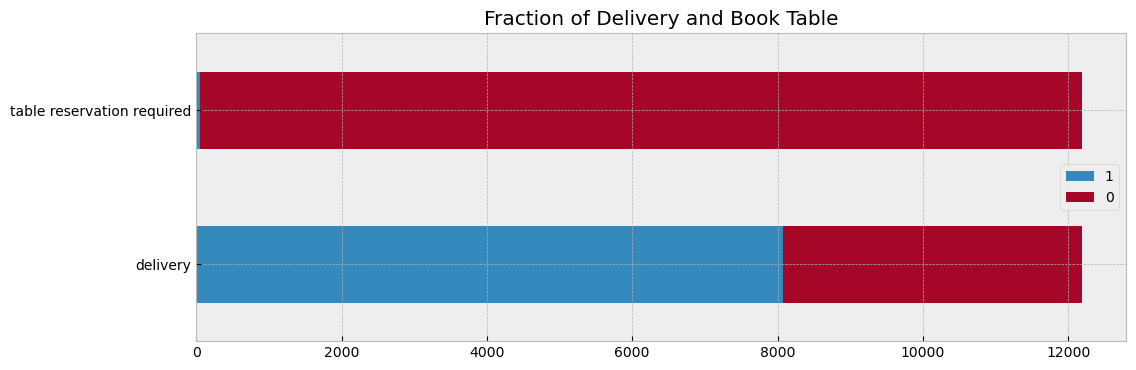

In [27]:
with plt.style.context('bmh', after_reset = True):
    plt.figure(figsize = (12,4))
    ax = plt.subplot(1,1,1)
    tmp = {}
    for col in ['delivery', 'table reservation required']: 
        tmp[col] = df[col].value_counts()
    tmp = pd.DataFrame.from_dict(tmp, orient = 'index')
    tmp.plot.barh(stacked = True, ax = ax)
    ax.set_title('Fraction of Delivery and Book Table')
    plt.show()



#### Lets take the rating of restaurant and find the average rating for each of the neighborhood

In [28]:
df.groupby(['locality'])['rate'].mean().sort_values()[-50:][:-1]

locality
Karve Nagar              3.400000
Pimple Saudagar          3.402174
Yerawada                 3.406780
Katraj                   3.408434
Kondhwa                  3.409249
NIBM Road                3.415385
Ravet                    3.418056
Sus                      3.418750
Magarpatta               3.432710
KP and Kalyani           3.442857
Hinjawadi                3.447896
Kharadi                  3.456134
Kothrud                  3.456589
Pashan                   3.461111
Rasta Peth               3.462791
Wakad                    3.474405
Lonavala                 3.491262
Aundh                    3.494000
Nigdi                    3.496190
Dhole Patil Road         3.500000
Model Colony             3.513158
Pimple Nilakh            3.516364
Camp Area                3.519167
Wanowrie Kondhwa Area    3.521429
Sadashiv Peth            3.525439
Shivaji Nagar            3.528889
Khadki                   3.532143
Mundhwa                  3.536145
Salunkhe Vihar Road      3.588372
SB Ro

In [29]:
df['url']= dataset['web_link']

### Number of restaurants in each Neighborhood

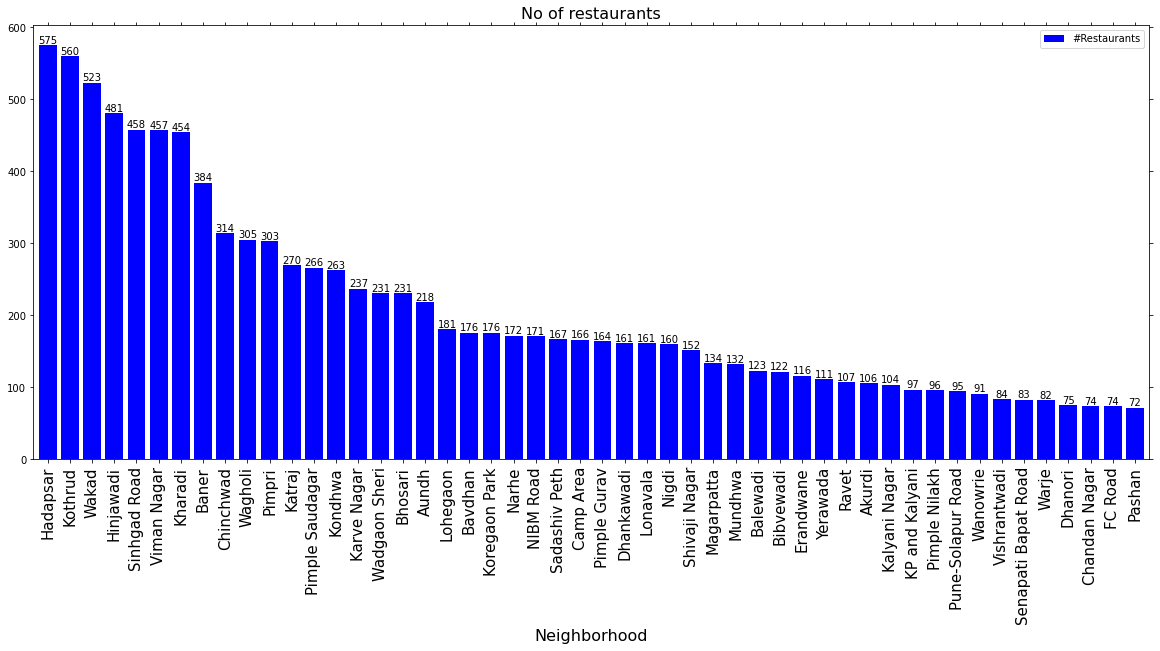

In [30]:
histo = df.groupby('locality')['url'].count().sort_values(ascending=False)[:50]
ax = histo.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .05, label,
            ha='center', va='bottom', fontsize=10)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Neighborhood', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

Hadapsar has the highest number of restaurants followed by Kothrud

### Zomato's Presence across Pune

In [31]:
labels = list(df.locality.value_counts().index)
values = list(df.locality.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence in Pune",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Neighborhood",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

### Lets get the coordinates for each of the locality

In [107]:
location = [x for x in df['locality'].unique().tolist() if type(x) == str]

In [108]:
location.remove('Khandala')
location.remove('Pune-Solapur Road')
location.remove('Old Mumbai-Pune Highway')
location.remove('Magarpatta, Pune Sholapur Rd')
location.remove('Lavasa')
location.remove('Sus')
location.remove('Wanowrie Kondhwa Area')
location.remove('Koregaon Bhima')
location.remove('KP and Kalyani')
location.remove('SB Road - Aundh')
location = ['Phoenix Marketcity' if i=='Chandan Nagar' else i for i in location]
location = ['BT Kawade Road' if i=='B.T. Kawade Road' else i for i in location]
location = ['Pune Camp' if i=='Camp Area' else i for i in location]
location = ['MG Road' if i=='Camp-MG Road Area' else i for i in location]
location = ['Peth Area' if i=='Deccan & Peths' else i for i in location]
location = ['Bharti Vidyapeeth' if i=='Dhankawadi' else i for i in location]
location = ['Erandwane Area' if i=='Erandwane' else i for i in location]
location = ['MG Road' if i=='Camp-MG Road Area' else i for i in location]

In [109]:
latitude = []
longitude =  []
for i in range(0, len(location)):
    if(type(location[i]) == str):
        ctr=0
        while True:
            try:
                address = location[i] + ', Pune, India'
                geolocator = Nominatim(user_agent="ny_explorer")
                loc = geolocator.geocode(address)
                latitude.append(loc.latitude)
                longitude.append(loc.longitude)
                print('The geograpical coordinate of location are {}, {}.'.format(loc.latitude, loc.longitude))
            except:
                ctr+=1
                if(ctr==7):
                    print(i)
                    latitude.append(address)
                    longitude.append(address)
                    break
                continue
            break


The geograpical coordinate of location are 18.5678722, 73.7679845.
The geograpical coordinate of location are 18.5000084, 73.7501119.
The geograpical coordinate of location are 18.5408064, 73.8305146.
The geograpical coordinate of location are 18.521428, 73.8544541.
The geograpical coordinate of location are 18.6022495, 73.7644454.
The geograpical coordinate of location are 18.5102123, 73.8800732.
The geograpical coordinate of location are 18.5656319, 73.8865762.
The geograpical coordinate of location are 18.5209541, 73.7780873.
The geograpical coordinate of location are 18.5481382, 73.9025513.
The geograpical coordinate of location are 18.1919971, 73.8594505.
The geograpical coordinate of location are 18.5412985, 73.8850614.
The geograpical coordinate of location are 18.5650297, 73.9161442.
The geograpical coordinate of location are 18.5319183, 73.9173463.
The geograpical coordinate of location are 18.5158926, 73.84116.
The geograpical coordinate of location are 18.526967, 73.9278252.

In [110]:
location

['Hinjawadi',
 'Bhugaon',
 'Senapati Bapat Road',
 'Shivaji Nagar',
 'Wakad',
 'East Street',
 'Yerawada',
 'Bavdhan',
 'Kalyani Nagar',
 'Narhe',
 'Bund Garden Road',
 'Viman Nagar',
 'Magarpatta',
 'Deccan Gymkhana',
 'Hadapsar',
 'Baner',
 'Shivapur',
 'Mundhwa',
 'FC Road',
 'Kothrud',
 'Koregaon Park',
 'Erandwane Area',
 'MG Road',
 'Karve Nagar',
 'Sadashiv Peth',
 'Pune University',
 'JM Road',
 'Dhole Patil Road',
 'Pune Camp',
 'Pimple Saudagar',
 'Kharadi',
 'Ravet',
 'Aundh',
 'Nigdi',
 'Kondhwa',
 'Swargate',
 'Katraj',
 'Khadki',
 'Salunkhe Vihar Road',
 'Law College Road',
 'Pimple Nilakh',
 'Pashan',
 'Lonavala',
 'NIBM Road',
 'Balewadi',
 'Dange Chowk',
 'Pimpri Chinchwad Area',
 'Wadgaon Sheri',
 'Pimpri',
 'Chinchwad',
 'Phoenix Marketcity',
 'Fatima Nagar',
 'Budhwar Peth',
 'Warje',
 'Wagholi',
 'Akurdi',
 'Bibvewadi',
 'Rasta Peth',
 'Sinhgad Road',
 'Model Colony',
 'Parvati',
 'Pimple Gurav',
 'Lohegaon',
 'Bharti Vidyapeeth',
 'Bhosari',
 'Satara Road',
 'Tala

In [111]:
df['location_latitude'] = df['locality'].map(dict(zip(location, latitude)))
df['location_longitude'] = df['locality'].map(dict(zip(location, longitude)))

In [112]:
df['location_latitude'] = df['location_latitude'].fillna(0)
df['location_longitude'] = df['location_longitude'].fillna(0)

In [113]:
dataframe_filtered = df.groupby(['locality'])['location_latitude', 'location_longitude'].first()
dataframe_filtered['no_restaurant'] = df.groupby(['locality'])[['url']].count()
venues_map = folium.Map(location=[18.5179808, 73.8554419], zoom_start=11) # generate map centred around Pune

states = folium.map.FeatureGroup()
i=0
for lat, lng, in zip(dataframe_filtered.location_latitude, dataframe_filtered.location_longitude):
    states.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )
    i+=1
i=0
for lat, lng, in zip(dataframe_filtered.location_latitude, dataframe_filtered.location_longitude):
    states.add_child(
        folium.features.Marker(
            [lat, lng],
            popup= dataframe_filtered.index[i],
        )
    )
    i+=1
# add incidents to map
venues_map.add_child(states)
venues_map

<ipython-input-113-34a5737209f8>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### Plot map by density of restaurants in each locality

In [157]:
bins = pd.IntervalIndex.from_tuples([(0, 100), (101, 200), (201, 300), (301, 400), (401, 500), (501, 600)])
dataframe_filtered['category'] = pd.cut(dataframe_filtered['no_restaurant'], bins)

In [158]:
x = dataframe_filtered.groupby('category').groups.keys()

In [159]:
venues_map = folium.Map(location=[18.5179808, 73.8554419], zoom_start=11) # generate map centred around Pune

states = folium.map.FeatureGroup()
i=0
for lat, lng, in zip(dataframe_filtered.location_latitude, dataframe_filtered.location_longitude):
    states.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )
    i+=1
colors = ['red', 'blue', 'green', 'purple', 'orange', 'white', 'pink', 'gray', 'black']
j=0
for i in range(0,len(list(x))):
    group = dataframe_filtered.groupby('category').get_group(list(x)[i])
    i=0
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1
# add incidents to map
venues_map.add_child(states)

# url = ('https://raw.githubusercontent.com/SECOORA/static_assets/'
#        'master/maps/img/rose.png')
# FloatImage(image_file, bottom=40, left=65).add_to(venues_map)
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});
</script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Number of restaurants</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>0-100</li>
    <li><span style='background:blue;opacity:0.7;'></span>101-200</li>
    <li><span style='background:green;opacity:0.7;'></span>201-300</li>
    <li><span style='background:purple;opacity:0.7;'></span>301-400</li>
    <li><span style='background:orange;opacity:0.7;'></span>401-500</li>
    <li><span style='background:white;opacity:0.7;'></span>501-600</li>
    <li><span style='background:pink;opacity:0.7;'></span>601-700</li>
    <li><span style='background:gray;opacity:0.7;'></span>701-800</li>
    <li><span style='background:black;opacity:0.7;'></span>801-900</li>
  </ul>
  </div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
    .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

venues_map.get_root().add_child(macro)

venues_map

Analysing the data we found that central Pune is densely populated while there aren't much markers at the outer part of the city.

### Localities by rating

In [160]:
nb_rate_df = df.groupby(['locality'])['location_latitude', 'location_longitude'].first()
nb_rate_df['rate'] = df.groupby(['locality'])['rate'].mean()
nb_rate_df

<ipython-input-160-3142302cd612>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



location_latitude  location_longitude        rate
locality                                                                
Akurdi                         18.648600           73.764736  396.534653
Around Pune                    18.553316           73.807092         NaN
Aundh                          18.561883           73.810196  507.325581
B.T. Kawade Road                0.000000            0.000000  429.545455
Balewadi                       18.582027           73.768983  438.636364
...                                  ...                 ...         ...
Wakad                          18.602249           73.764445  456.569343
Wanowrie                       18.488368           73.898667  400.609756
Wanowrie Kondhwa Area           0.000000            0.000000  309.090909
Warje                          18.482044           73.800170  419.594595
Yerawada                       18.565632           73.886576  503.333333

[99 rows x 3 columns]

In [172]:
bins = pd.IntervalIndex.from_tuples([(3.2, 3.3), (3.31, 3.4), (3.41, 3.5), (3.51, 3.6), (3.61, 3.7), (3.71, 3.8), (3.81, 3.9), (3.91, 4.0)])
nb_rate_df['category'] = pd.cut(nb_rate_df['rate'], bins)

In [173]:
x = nb_rate_df.groupby('category').groups.keys()

In [174]:
venues_map = folium.Map(location=[18.5179808, 73.8554419], zoom_start=11) # generate map centred around Pune

states = folium.map.FeatureGroup()
i=0
for lat, lng, in zip(nb_rate_df.location_latitude, nb_rate_df.location_longitude):
    states.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )
    i+=1
colors = ['red', 'blue', 'green', 'purple', 'orange', 'white', 'pink', 'gray', 'black']
j=0
for i in range(0,len(list(x))):
    group = nb_rate_df.groupby('category').get_group(list(x)[i])
    i=0
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1
# add incidents to map
venues_map.add_child(states)

# url = ('https://raw.githubusercontent.com/SECOORA/static_assets/'
#        'master/maps/img/rose.png')
# FloatImage(image_file, bottom=40, left=65).add_to(venues_map)
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Number of restaurants</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>3.2-3.3</li>
    <li><span style='background:blue;opacity:0.7;'></span>3.31-3.4</li>
    <li><span style='background:green;opacity:0.7;'></span>3.41-3.5</li>
    <li><span style='background:purple;opacity:0.7;'></span>3.51-3.6</li>
    <li><span style='background:orange;opacity:0.7;'></span>3.61-3.7</li>
    <li><span style='background:white;opacity:0.7;'></span>3.71-3.8</li>
    <li><span style='background:pink;opacity:0.7;'></span>3.81-3.9</li>
    <li><span style='background:gray;opacity:0.7;'></span>3.91-4.0</li>
    <li><span style='background:black;opacity:0.7;'></span>4.04.1</li>
  </ul>
</div>
</div>
 
</body>
</html>
<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

venues_map.get_root().add_child(macro)

venues_map

KeyError: Interval(3.2, 3.3, closed='right')

### Locality by cost of food

In [125]:
df['avg_cost'].value_counts

<bound method IndexOpsMixin.value_counts of 0        ₹1,400
1        ₹1,500
2        ₹2,500
3        ₹1,400
4        ₹1,500
          ...  
12184       NaN
12185       NaN
12186      ₹300
12187    ₹1,200
12188      ₹200
Name: avg_cost, Length: 12189, dtype: object>

In [126]:
df['avg_cost'] = df['avg_cost'].apply(lambda x: str(x).split('₹')[-1])

In [127]:
df['avg_cost'] = df['avg_cost'].str.replace(',','')

In [133]:
a = list(df['avg_cost'])
for i in range(0, len(a)):
    if a[i] == 'Not Present':
        a[i] = 'unrated'
    
df['avg_cost'] = a

df['avg_cost'].value_counts()

a = list(df['avg_cost'])
for i in range(0, len(a)):
    if a[i] == 'unrated':
        a[i] = None
    else :
        a[i] = float(a[i])
df['rate'] = a

In [134]:
df['avg_cost'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1400
1        1500
2        2500
3        1400
4        1500
         ... 
12184     nan
12185     nan
12186     300
12187    1200
12188     200
Name: avg_cost, Length: 12189, dtype: object>

In [135]:
df['avg_cost'] = df['avg_cost'].replace('nan', np.NaN, regex=True)

In [136]:
df['avg_cost'] = df['avg_cost'].fillna(0)

In [137]:
df['avg_cost'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1400
1        1500
2        2500
3        1400
4        1500
         ... 
12184       0
12185       0
12186     300
12187    1200
12188     200
Name: avg_cost, Length: 12189, dtype: object>

#### Lets see the cost of food in each locality of Pune

In [175]:
df['avg_cost'] = df['avg_cost'].astype(float)

But before that lets remove all those places that has less than 20 restaurants

In [176]:
above_20 = df.groupby('locality')['url'].count()[df.groupby('locality')['url'].count() >= 20].index

##### Does this mean higher the cost of food means posche area!?

In [178]:
df[df['locality'].isin(above_20)].groupby('locality')['avg_cost'].mean().sort_values(ascending= False).head(n=10)

locality
Bund Garden Road           1195.000000
Kondhwa                    1110.076046
Old Mumbai-Pune Highway     784.375000
Mundhwa                     754.545455
Lonavala                    737.571429
Koregaon Park               713.750000
Kalyani Nagar               683.173077
Senapati Bapat Road         619.879518
East Street                 617.307692
Khadakwasla                 580.000000
Name: avg_cost, dtype: float64

In [179]:
nb_cost_df = df.groupby(['locality'])['location_latitude', 'location_longitude'].first()
nb_cost_df['cost'] = df.groupby(['locality'])['avg_cost'].mean()
nb_cost_df

<ipython-input-179-87e12a96c5d2>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



location_latitude  location_longitude        cost
locality                                                                
Akurdi                         18.648600           73.764736  377.830189
Around Pune                    18.553316           73.807092    0.000000
Aundh                          18.561883           73.810196  400.275229
B.T. Kawade Road                0.000000            0.000000  410.869565
Balewadi                       18.582027           73.768983  392.276423
...                                  ...                 ...         ...
Wakad                          18.602249           73.764445  358.795411
Wanowrie                       18.488368           73.898667  360.989011
Wanowrie Kondhwa Area           0.000000            0.000000   62.962963
Warje                          18.482044           73.800170  378.658537
Yerawada                       18.565632           73.886576  408.108108

[99 rows x 3 columns]

In [180]:
bins = pd.IntervalIndex.from_tuples([(200, 500), (601, 800), (801, 1000), (1001, 1500)])
nb_cost_df['category'] = pd.cut(nb_cost_df['cost'], bins)

In [181]:
x = nb_cost_df.groupby('category').groups.keys()
venues_map = folium.Map(location=[18.5179808, 73.8554419], zoom_start=11) # generate map centred around Pune

states = folium.map.FeatureGroup()
i=0
for lat, lng, in zip(nb_cost_df.location_latitude, nb_cost_df.location_longitude):
    states.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )
    i+=1
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']
j=0
for i in range(0,len(list(x))):
    group = nb_cost_df.groupby('category').get_group(list(x)[i])
    i=0
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1
# add incidents to map
venues_map.add_child(states)

# url = ('https://raw.githubusercontent.com/SECOORA/static_assets/'
#        'master/maps/img/rose.png')
# FloatImage(image_file, bottom=40, left=65).add_to(venues_map)
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Cost</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>200-500</li>
    <li><span style='background:blue;opacity:0.7;'></span>501-800</li>
    <li><span style='background:green;opacity:0.7;'></span>801-1000</li>
    <li><span style='background:purple;opacity:0.7;'></span>1001-1500</li>
  </ul>
</div>
</div>
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

venues_map.get_root().add_child(macro)

venues_map


It can be seen that all the costly restaurants are located in Koregaon Park, Kalyani Nagar, SB Road, East Street.

Yes it can therefore be said from higher cost of food means posche area comparing it to the ground truth of Pune

### Grouping the localities by the type of restaurant

In [243]:
types = set()
def func(x):
    if(type(x) == list):
        print(x)
        for y in x:
            types.add(y.strip())
_ = df['type'].str.split(',').apply(func)

['Casual Dining']
['Lounge', ' Casual Dining']
['Fine Dining']
['Casual Dining', ' Bar']
['Bar', ' Casual Dining']
['Bar', ' Casual Dining']
['Casual Dining']
['Pub', ' Casual Dining']
['Bakery']
['Casual Dining']
['Bar', ' Casual Dining']
['Bar']
['Bar', ' Casual Dining']
['Casual Dining']
['Quick Bites']
['Bar', ' Casual Dining']
['Bar', ' Casual Dining']
['Casual Dining', ' Bar']
['Café']
['Casual Dining']
['Casual Dining']
['Bar', ' Casual Dining']
['Bar', ' Casual Dining']
['Bar', ' Casual Dining']
['Bar', ' Casual Dining']
['Pub', ' Casual Dining']
['Casual Dining']
['Casual Dining', ' Bar']
['Bar', ' Casual Dining']
['Club']
['Pub', ' Casual Dining']
['Casual Dining']
['Bar', ' Casual Dining']
['Casual Dining']
['Casual Dining', ' Bar']
['Bar', ' Casual Dining']
['Casual Dining']
['Lounge', ' Casual Dining']
['Fine Dining']
['Casual Dining', ' Bar']
['Quick Bites']
['Casual Dining', ' Café']
['Café']
['Microbrewery']
['Casual Dining']
['Lounge']
['Casual Dining', ' Bar']
['Casua

['Casual Dining']
['Casual Dining']
['Sweet Shop']
['Bakery']
['Casual Dining']
['Casual Dining']
['Fine Dining']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Dessert Parlor']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Sweet Shop']
['Casual Dining']
['Quick Bites']
['Dessert Parlor']
['Dessert Parlor', ' Bakery']
['Takeaway', ' Delivery']
['Bar']
['Takeaway']
['Lounge', ' Casual Dining']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Takeaway', ' Delivery']
['Delivery']
['Quick Bites']
['Delivery']
['Quick Bites']
['Quick Bites']
['Café']
['Quick Bites']
['Quick Bites']
['Bar', ' Casual Dining']
['Bar', ' Casual Dining']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Casual Dining', ' Bar']
['Dessert Parlor']
['Quick Bites']
['Bakery']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Café']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Casual Dining

['Quick Bites']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Delivery']
['Dessert Parlor']
['Casual Dining', ' Bar']
['Casual Dining', ' Bar']
['Casual Dining']
['Quick Bites']
['Sweet Shop', ' Quick Bites']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Casual Dining']
['Lounge', ' Casual Dining']
['Bar', ' Casual Dining']
['Casual Dining']
['Casual Dining']
['Bar']
['Casual Dining']
['Café']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Bar', ' Casual Dining']
['Dhaba']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Food Truck']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Delivery']
['Delivery']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Delivery']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Dessert Parlor']
['Quick Bites']
['Takeaway', ' Delivery']
['Bar', ' 

['Takeaway', ' Delivery']
['Casual Dining']
['Delivery']
['Beverage Shop']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Bakery']
['Quick Bites']
['Quick Bites']
['Dhaba']
['Delivery']
['Takeaway', ' Delivery']
['Casual Dining']
['Delivery']
['Quick Bites']
['Quick Bites']
['Paan Shop']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Food Court']
['Dessert Parlor']
['Quick Bites']
['Quick Bites']
['Dessert Parlor']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Bakery', ' Dessert Parlor']
['Dessert Parlor']
['Café']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Café']
['Quick Bites']
['Casual Dining', ' Bar']
['Quick Bites

['Casual Dining']
['Bar', ' Casual Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining', ' Bar']
['Casual Dining']
['Delivery']
['Quick Bites']
['Delivery']
['Quick Bites']
['Delivery']
['Delivery']
['Takeaway', ' Delivery']
['Delivery']
['Bakery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Beverage Shop', ' Dessert Parlor']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Café']
['Quick Bites']
['Dessert Parlor']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Café']
['Quick Bites']
['Bakery', ' Sweet Shop']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Delivery']
['Quick Bites']
['Casual Dining', ' Lounge']
['Quick Bites']
['Bakery']
['Quick Bites']
['Casual Dining', ' Bar']
['Casual Dining']
['Delivery']
['Quick Bites']
['Delivery']
['Casual Dining']
['Quick Bites']
['Delivery']
['Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
[

['Quick Bites']
['Quick Bites']
['Dhaba']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Delivery']
['Sweet Shop']
['Delivery']
['Takeaway']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining', ' Bar']
['Quick Bites']
['Quick Bites']
['Delivery']
['Casual Dining']
['Food Court']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Bakery']
['Food Court']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Dessert Parlor']
['Sweet Shop', ' Quick Bites']
['Quick Bites']
['Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Lounge']
['Quick Bites']
['Delivery']
['Food Court']
['Dessert Parlor']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Beverage Shop']
['Dhaba']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Casual Dining']
['Takeaway', ' Delivery']

['Dessert Parlor']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Beverage Shop']
['Sweet Shop']
['Quick Bites']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Dessert Parlor']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Delivery']
['Bakery', ' Dessert Parlor']
['Takeaway', ' Delivery']
['Quick Bites']
['Casual Dining']
['Takeaway', ' Delivery']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Café']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Food Court']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Casual Dining', ' Bar']
['Dessert Parlor']
['Quick Bites']
['Food Court']
['Quick Bites']
['Casual Dining']
['Bakery']
['Bhojanalya']
['Café']
['Takeaway', ' Delivery']
['Quick Bites']
['Casual Dining', ' Bar']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick B

['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Bar', ' Casual Dining']
['Quick Bites']
['Casual Dining', ' Bar']
['Beverage Shop']
['Quick Bites']
['Takeaway']
['Quick Bites']
['Quick Bites']
['Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Casual Dining', ' Bar']
['Quick Bites']
['Café']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Casual Dining']
['Food Court']
['Lounge']
['Bakery']
['Food Court']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Café']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Bakery']
['Quick Bites']
['Quick Bites']
['Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Lounge']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Bakery']
['Quick Bites']
['Quick Bites']
['Food Truck']
['Bakery']
['Quick Bites']
['Delivery']
['Quick Bites']
['Quick Bites']
['Bakery'

['Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Delivery']
['Takeaway', ' Delivery']
['Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Sweet Shop']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Sweet Shop']
['Takeaway', ' Delivery']
['Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Delivery']
['Quick Bites']
['Quick Bites']
['Takeaway']
['Café']
['Takeaway', ' Delivery']
['Quick Bites']
['Takeaway']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Delivery']
['Takeaway', ' Delivery']
['Casual Dining']
['Quick Bites']
['Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Delivery']


['Café']
['Dessert Parlor']
['Dessert Parlor']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Takeaway']
['Casual Dining']
['Quick Bites']
['Casual Dining']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Bakery']
['Quick Bites']
['Delivery']
['Takeaway', ' Delivery']
['Bakery']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Food Court']
['Quick Bites']
['Quick Bites']
['Dessert Parlor']
['Dessert Parlor']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Bakery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Irani Cafe']
['Casual Dining']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Cas

['Takeaway', ' Delivery']
['Quick Bites']
['Bakery']
['Casual Dining']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Paan Shop']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Food Court']
['Quick Bites']
['Delivery']
['Quick Bites']
['Café']
['Bakery']
['Dessert Parlor']
['Dessert Parlor']
['Quick Bites']
['Dessert Parlor', ' Quick Bites']
['Takeaway', ' Delivery']
['Casual Dining', ' Bar']
['Casual Dining']
['Quick Bites']
['Dessert Parlor', ' Café']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Food Court']
['Quick Bites']
['Takeaway', ' Delivery']
['Dessert Parlor']
['Casual Dining']
['Casual Dining']
['Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Dessert Parlor', ' 

['Casual Dining']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Dessert Parlor']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Kiosk']
['Quick Bites']
['Bakery']
['Quick Bites']
['Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Kiosk']
['Takeaway', ' Delivery']
['Delivery']
['Café']
['Takeaway', ' Delivery']
['Quick Bites']
['Delivery']
['Takeaway']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Dessert Parlor']
['Quick Bites']
['Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Kiosk']
['Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Café']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Deliv

['Bakery']
['Quick Bites']
['Dessert Parlor']
['Quick Bites']
['Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Kiosk']
['Takeaway', ' Delivery']
['Casual Dining']
['Quick Bites']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Sweet Shop']
['Takeaway', ' Delivery']
['Casual Dining']
['Dessert Parlor']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Casual Dining', ' Bar']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Delivery']
['Takeaway']
['Food Court']
['Delivery']
['Delivery']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Delivery']
['Food Truck']
['Quick Bites']
['Quick Bites']
['Delivery']
['Takeaway',

['Takeaway', ' Delivery']
['Quick Bites']
['Delivery']
['Takeaway', ' Delivery']
['Delivery']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Delivery']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Delivery']
['Takeaway', ' Delivery']
['Delivery']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Delivery']
['Takeaway', ' Delivery']
['Delivery']
['Delivery']
['Beverage Shop']
['Takeaway', ' Delivery']
['Quick Bites']
['Delivery']
['Delivery']
['Delivery']
['Quick Bites']
['Delivery']
['Quick Bites']
['Delivery']
['Quick Bites']
['Fine Dining']
['Quick Bites']
['Delivery']
['Takeaway', ' Delivery']
['Delivery']
['Quick Bites']
['Quick Bites']
['Café']
['Takeaway', ' Delivery']
['Casual Dining']
['Delivery']
['Tak

In [244]:
column_names = list(types)
# instantiate the dataframe
neighborhood = pd.DataFrame(columns=column_names)
neighborhood

Empty DataFrame
Columns: [Bar, Bhojanalya, Club, Irani Cafe, Dessert Parlor, Sweet Shop, Kiosk, Casual, Confectionery, Dhaba, Bakery, Quick Bites, Delivery, Lounge, Takeaway, Casual Dining, Food Court, Microbrewery, Café, Food Truck, Paan Shop, Mess, Beverage Shop, Pub, Fine Dining]
Index: []

In [245]:
neighborhood['neighborhood'] = df.groupby('locality').groups.keys()
neighborhood = neighborhood.set_index('neighborhood').fillna(0)
neighborhood

Bar  Bhojanalya  Club  Irani Cafe  Dessert Parlor  \
neighborhood                                                               
Akurdi                   0           0     0           0               0   
Around Pune              0           0     0           0               0   
Aundh                    0           0     0           0               0   
B.T. Kawade Road         0           0     0           0               0   
Balewadi                 0           0     0           0               0   
...                    ...         ...   ...         ...             ...   
Wakad                    0           0     0           0               0   
Wanowrie                 0           0     0           0               0   
Wanowrie Kondhwa Area    0           0     0           0               0   
Warje                    0           0     0           0               0   
Yerawada                 0           0     0           0               0   

                       Sweet Shop  Kiosk  Casual  Confectionery  Dhaba  \
neighborhood                                                             
Akurdi                          0      0       0              0      0   
Around Pune                     0      0       0              0      0   
Aundh                           0      0       0              0      0   
B.T. Kawade Road                0      0       0              0      0   
Balewadi                        0      0       0              0      0   
...                           ...    ...     ...            ...    ...   
Wakad                           0      0       0              0      0   
Wanowrie                        0      0       0              0      0   
Wanowrie Kondhwa Area           0      0       0              0      0   
Warje                           0      0       0              0      0   
Yerawada                        0      0       0              0      0   

                       Bakery  Quick Bites  Delivery  Lounge  Takeaway  \
neighborhood                                                             
Akurdi                      0            0         0       0         0   
Around Pune                 0            0         0       0         0   
Aundh                       0            0         0       0         0   
B.T. Kawade Road            0            0         0       0         0   
Balewadi                    0            0         0       0         0   
...                       ...          ...       ...     ...       ...   
Wakad                       0            0         0       0         0   
Wanowrie                    0            0         0       0         0   
Wanowrie Kondhwa Area       0            0         0       0         0   
Warje                       0            0         0       0         0   
Yerawada                    0            0         0       0         0   

                       Casual Dining  Food Court  Microbrewery  Café  \
neighborhood                                                           
Akurdi                             0           0             0     0   
Around Pune                        0           0             0     0   
Aundh                              0           0             0     0   
B.T. Kawade Road                   0           0             0     0   
Balewadi                           0           0             0     0   
...                              ...         ...           ...   ...   
Wakad                              0           0             0     0   
Wanowrie                           0           0             0     0   
Wanowrie Kondhwa Area              0           0             0     0   
Warje                              0           0             0     0   
Yerawada                           0           0             0     0   

                       Food Truck  Paan Shop  Mess  Beverage Shop  Pub  \
neighborhood                                                             
Akurdi                 

In [246]:
i=0
for i in range(0,len(df)):
    for x in types:
        if type(df.loc[i, 'type']) == str and x in df.loc[i, 'type']:
            neighborhood.loc[df.loc[i, 'locality'], x] = neighborhood.loc[df.loc[i, 'locality'], x]+1

In [247]:
neighborhood

Bar  Bhojanalya  Club  Irani Cafe  Dessert Parlor  \
neighborhood                                                               
Akurdi                   2           0     0           0               6   
Around Pune              0           0     0           0               0   
Aundh                    5           1     0           0              12   
B.T. Kawade Road         3           0     0           0               1   
Balewadi                 3           0     0           0               5   
...                    ...         ...   ...         ...             ...   
Wakad                   22           2     0           0              18   
Wanowrie                 2           0     0           0               7   
Wanowrie Kondhwa Area    0           0     0           0               1   
Warje                    0           0     0           0               2   
Yerawada                 7           0     0           1               3   

                       Sweet Shop  Kiosk  Casual  Confectionery  Dhaba  \
neighborhood                                                             
Akurdi                          1      0      31              0      1   
Around Pune                     0      0       0              0      0   
Aundh                           4      0      51              0      1   
B.T. Kawade Road                1      0       4              0      0   
Balewadi                        0      0      27              0      0   
...                           ...    ...     ...            ...    ...   
Wakad                           7      1      89              0      2   
Wanowrie                        1      0      18              0      0   
Wanowrie Kondhwa Area           1      0       0              0      0   
Warje                           1      2      21              0      1   
Yerawada                        0      0      20              0      1   

                       Bakery  Quick Bites  Delivery  Lounge  Takeaway  \
neighborhood                                                             
Akurdi                      0           55         5       2         4   
Around Pune                 0            0         3       0         0   
Aundh                       7           82        43       0        30   
B.T. Kawade Road            1           10         1       1         1   
Balewadi                    0           66        13       1         9   
...                       ...          ...       ...     ...       ...   
Wakad                      15          263       106       0        63   
Wanowrie                   10           42         9       0         5   
Wanowrie Kondhwa Area       1            1        42       0         7   
Warje                       0           43         8       0         6   
Yerawada                    3           57        20       1         8   

                       Casual Dining  Food Court  Microbrewery  Café  \
neighborhood                                                           
Akurdi                            31           0             0     8   
Around Pune                        0           0             0     0   
Aundh                             50           5             0    15   
B.T. Kawade Road                   4           1             0     2   
Balewadi                          27           6             0     3   
...                              ...         ...           ...   ...   
Wakad                             87           6             0    12   
Wanowrie                          18           4             0     7   
Wanowrie Kondhwa Area              0           0             0     0   
Warje                             21           0             0     2   
Yerawada                          20           2             0     1   

                       Food Truck  Paan Shop  Mess  Beverage Shop  Pub  \
neighborhood                                                             
Akurdi                 

#### Swarm Plot

In [248]:
dfs = neighborhood.reset_index().melt('neighborhood', var_name='cols',  value_name='vals')

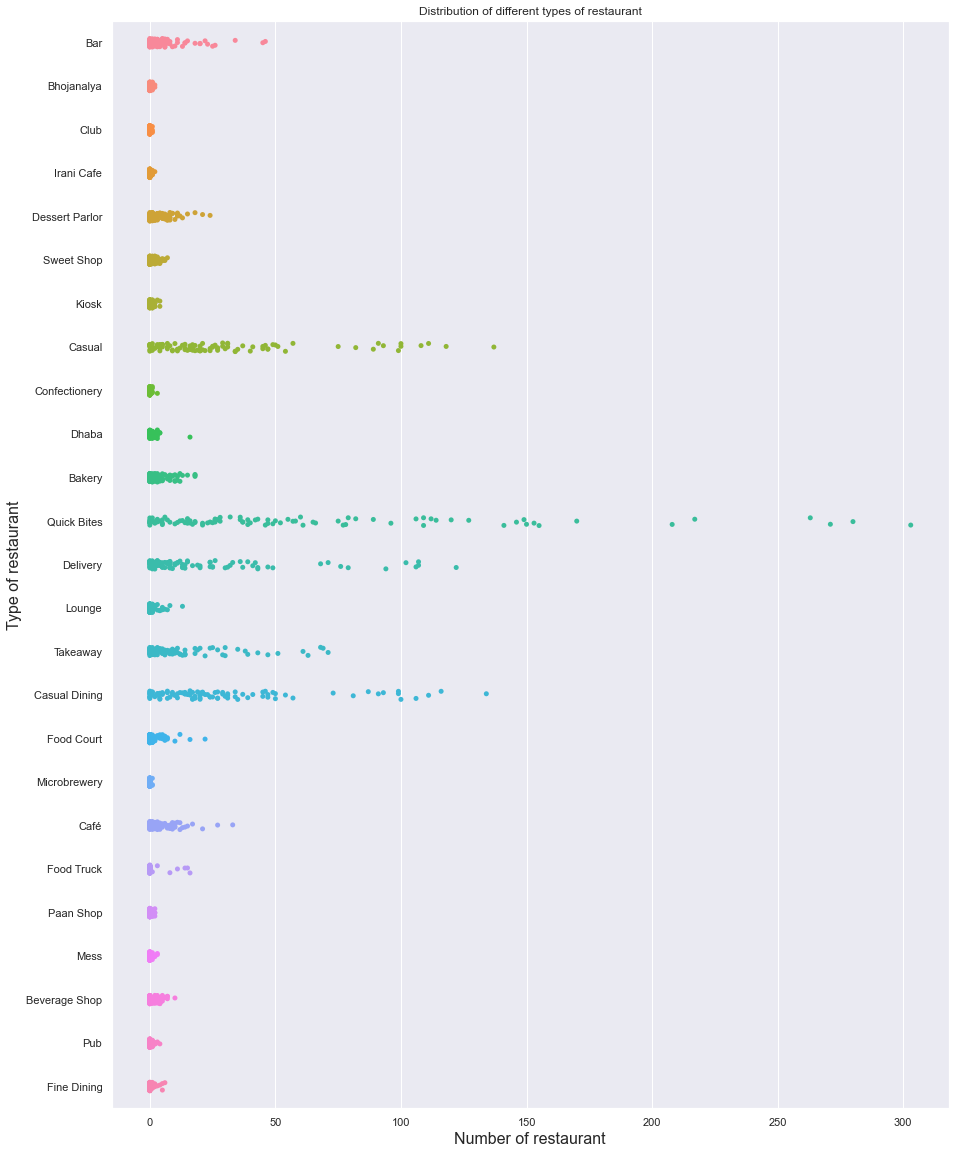

In [249]:
plt.figure(figsize=(15,20))
ax = sns.stripplot(x="vals", y="cols", data=dfs)
ax.set_xlabel('Number of restaurant', fontsize=16)
ax.set_ylabel('Type of restaurant', fontsize=16)
ax.set_title('Distribution of different types of restaurant')
plt.savefig("swarm.png")

It can be seen that there are more number of Quick Bites restaurants followed by Delivery restaurant and Casual Dining which was quite obvious to us.

### Grouping the localities by the cuisines

Is there any locality that is more famous for its cuisines?

In [250]:
types = set()
def func(x):
    if(type(x) == list):
        for y in x:
            types.add(y.strip())
_ = df['cuisines'].str.split(',').apply(func)

In [251]:
column_names = list(types)
# instantiate the dataframe
neighborhood_cns = pd.DataFrame(columns=column_names)
neighborhood_cns

Empty DataFrame
Columns: [Parsi, Arabian, Goan, Andhra, Bohri, German, Pizza, Malaysian, Charcoal Chicken, Continental, Sushi, Fast Food, Italian, South Indian, Biryani, Gujarati, Middle Eastern, Odia, Tea, Afghan, South American, Burger, Hot dogs, Hyderabadi, Awadhi, Spanish, Roast Chicken, Desserts, Turkish, Greek, European, Mangalorean, Assamese, Malwani, Rolls, Korean, Juices, Bihari, Mediterranean, Momos, Ice Cream, Cantonese, Cafe, Kebab, Asian, North Eastern, American, Mughlai, Beverages, Kerala, Cafe Food, Nepalese, Indonesian, Paan, Seafood, Mishti, BBQ, Salad, Bar Food, Maharashtrian, Modern Indian, Iranian, African, Mithai, Tamil, Finger Food, Street Food, Bubble Tea, Tibetan, Kashmiri, North Indian, Vietnamese, Chettinad, Mongolian, Rajasthani, Wraps, Panini, Mexican, French, Chinese, Thai, Japanese, Steak, Indian, Coffee, Naga, Bakery, Healthy Food, Lucknowi, Burmese, Ethiopian, Tex-Mex, Bengali, Sandwich, Frozen Yogurt, Lebanese, Brazilian, Konkan, Sindhi]
Index: []

In [252]:
neighborhood_cns['neighborhood'] = df.groupby('locality').groups.keys()
neighborhood_cns = neighborhood_cns.set_index('neighborhood').fillna(0)
neighborhood_cns

Parsi  Arabian  Goan  Andhra  Bohri  German  Pizza  \
neighborhood                                                                
Akurdi                     0        0     0       0      0       0      0   
Around Pune                0        0     0       0      0       0      0   
Aundh                      0        0     0       0      0       0      0   
B.T. Kawade Road           0        0     0       0      0       0      0   
Balewadi                   0        0     0       0      0       0      0   
...                      ...      ...   ...     ...    ...     ...    ...   
Wakad                      0        0     0       0      0       0      0   
Wanowrie                   0        0     0       0      0       0      0   
Wanowrie Kondhwa Area      0        0     0       0      0       0      0   
Warje                      0        0     0       0      0       0      0   
Yerawada                   0        0     0       0      0       0      0   

                       Malaysian  Charcoal Chicken  Continental  Sushi  \
neighborhood                                                             
Akurdi                         0                 0            0      0   
Around Pune                    0                 0            0      0   
Aundh                          0                 0            0      0   
B.T. Kawade Road               0                 0            0      0   
Balewadi                       0                 0            0      0   
...                          ...               ...          ...    ...   
Wakad                          0                 0            0      0   
Wanowrie                       0                 0            0      0   
Wanowrie Kondhwa Area          0                 0            0      0   
Warje                          0                 0            0      0   
Yerawada                       0                 0            0      0   

                       Fast Food  Italian  South Indian  Biryani  Gujarati  \
neighborhood                                                                 
Akurdi                         0        0             0        0         0   
Around Pune                    0        0             0        0         0   
Aundh                          0        0             0        0         0   
B.T. Kawade Road               0        0             0        0         0   
Balewadi                       0        0             0        0         0   
...                          ...      ...           ...      ...       ...   
Wakad                          0        0             0        0         0   
Wanowrie                       0        0             0        0         0   
Wanowrie Kondhwa Area          0        0             0        0         0   
Warje                          0        0             0        0         0   
Yerawada                       0        0             0        0         0   

                       Middle Eastern  Odia  Tea  Afghan  South American  \
neighborhood                                                               
Akurdi                              0     0    0       0               0   
Around Pune                         0     0    0       0               0   
Aundh                               0     0    0       0               0   
B.T. Kawade Road                    0     0    0       0               0   
Balewadi                            0     0    0       0               0   
...                               ...   ...  ...     ...             ...   
Wakad                               0     0    0       0               0   
Wanowrie                            0     0    0       0               0   
Wanowrie Kondhwa Area               0     0    0       0               0   
Warje                               0     0    0       0               0   
Yerawada                            0     0    0       0               0   

                       Burger  Hot dogs  Hyderabadi  A

In [253]:
i=0
for i in range(0,len(df)):
    for x in types:
        if type(df.loc[i, 'cuisines']) == str and x in df.loc[i, 'cuisines']:
            neighborhood_cns.loc[df.loc[i, 'locality'], x] = neighborhood_cns.loc[df.loc[i, 'locality'], x]+1

In [254]:
neighborhood_cns

Parsi  Arabian  Goan  Andhra  Bohri  German  Pizza  \
neighborhood                                                                
Akurdi                     0        0     1       0      0       0      1   
Around Pune                0        0     0       0      0       0      1   
Aundh                      0        0     1       0      0       0      3   
B.T. Kawade Road           0        0     0       0      0       0      0   
Balewadi                   0        0     0       0      0       0      3   
...                      ...      ...   ...     ...    ...     ...    ...   
Wakad                      0        2     1       0      0       0      9   
Wanowrie                   0        0     0       0      0       0      2   
Wanowrie Kondhwa Area      0        0     0       0      0       0      0   
Warje                      0        0     1       0      0       0      0   
Yerawada                   0        0     0       0      0       0      0   

                       Malaysian  Charcoal Chicken  Continental  Sushi  \
neighborhood                                                             
Akurdi                         0                 0            3      0   
Around Pune                    0                 0            0      0   
Aundh                          0                 0           13      0   
B.T. Kawade Road               0                 0            1      0   
Balewadi                       0                 0            7      0   
...                          ...               ...          ...    ...   
Wakad                          0                 0           27      0   
Wanowrie                       0                 0            3      0   
Wanowrie Kondhwa Area          0                 0            0      0   
Warje                          1                 0            1      0   
Yerawada                       0                 0            6      0   

                       Fast Food  Italian  South Indian  Biryani  Gujarati  \
neighborhood                                                                 
Akurdi                        20        2            11       11         0   
Around Pune                    1        0             0        0         0   
Aundh                         54       12            17       21         0   
B.T. Kawade Road               1        0             5        0         0   
Balewadi                      24        4            10       17         0   
...                          ...      ...           ...      ...       ...   
Wakad                        122       10            46       44         1   
Wanowrie                      31        2             5        5         0   
Wanowrie Kondhwa Area         13        0             1       10         0   
Warje                         12        2            11       10         0   
Yerawada                      14        2            10       17         0   

                       Middle Eastern  Odia  Tea  Afghan  South American  \
neighborhood                                                               
Akurdi                              0     0    2       0               0   
Around Pune                         0     0    0       0               0   
Aundh                               0     0    3       0               0   
B.T. Kawade Road                    0     0    0       0               0   
Balewadi                            0     0    0       1               0   
...                               ...   ...  ...     ...             ...   
Wakad                               1     3    1       0               0   
Wanowrie                            0     0    1       0               0   
Wanowrie Kondhwa Area               0     0    0       0               0   
Warje                               0     0    0       0               0   
Yerawada                            0     0    2       0               0   

                       Burger  Hot dogs  Hyderabadi  A

<AxesSubplot:ylabel='neighborhood'>

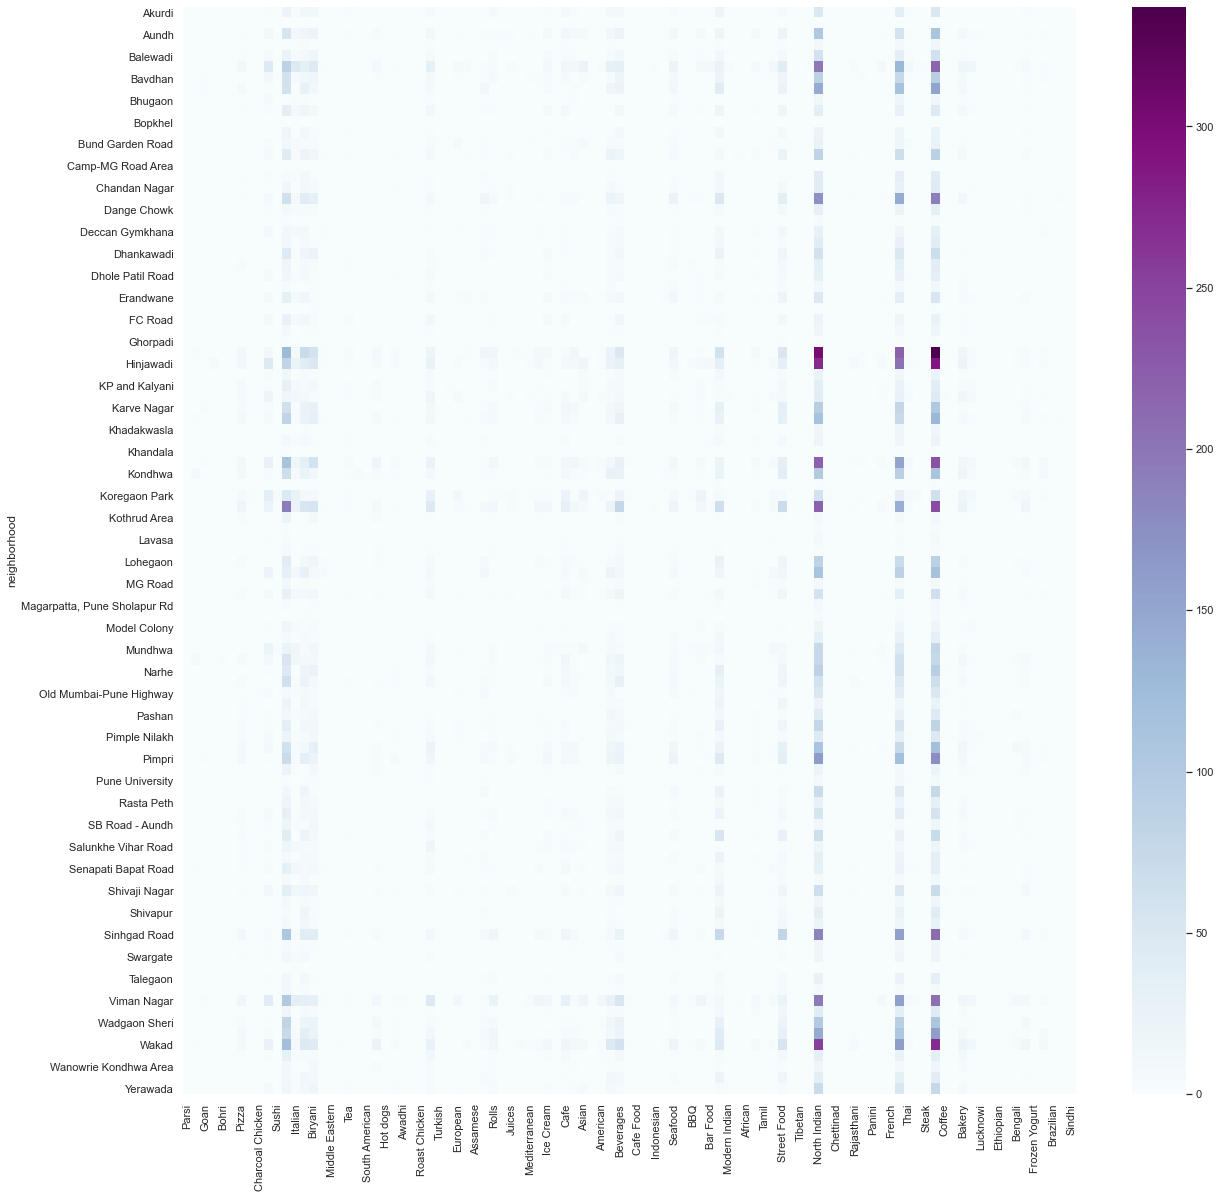

In [255]:
plt.figure(figsize=(20,20))
sns.heatmap(neighborhood_cns,cmap="BuPu")

So can we say, an area becomes more famous as a particular specififc type of cuisine/restaurant increases over there

### Top 15 Cuisines Of Bengaluru

C:\ProgramData\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



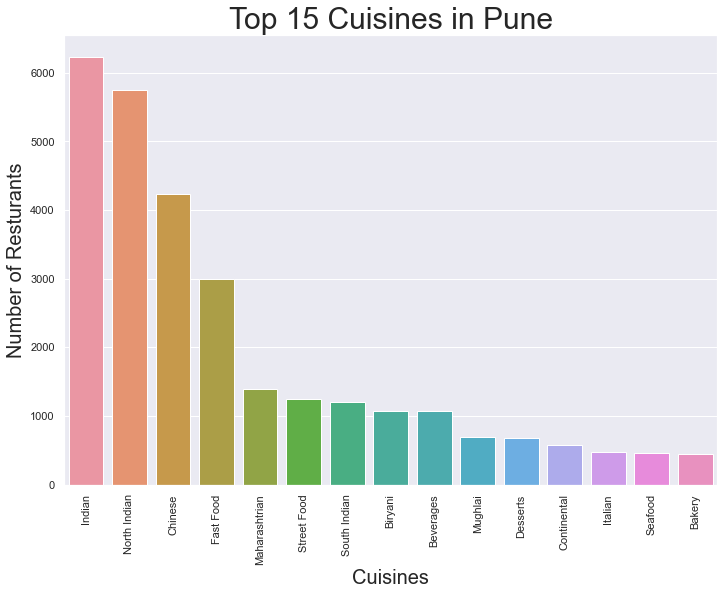

In [256]:
Cuisine_data = pd.DataFrame(neighborhood_cns.sum(axis=0))
Cuisine_data.reset_index(inplace=True)
Cuisine_data.columns = ['Cuisines', 'Number of Resturants']
Top15= (Cuisine_data.sort_values(['Number of Resturants'],ascending=False)).head(15)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(Top15['Cuisines'], Top15['Number of Resturants'])
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Number of Resturants', fontsize=20)
plt.title('Top 15 Cuisines in Pune', fontsize=30)
plt.xticks(rotation = 90)
plt.show()

C:\ProgramData\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



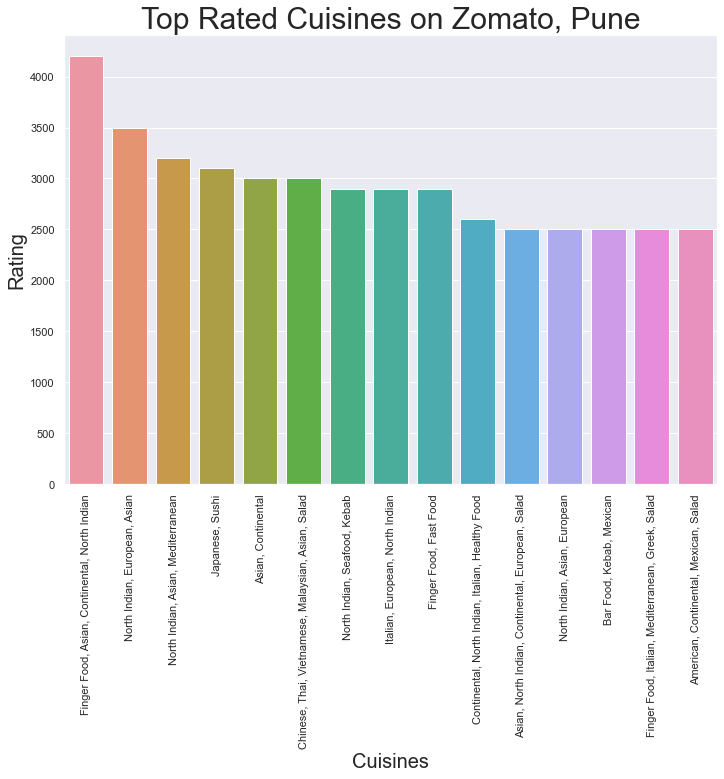

In [257]:
Cuisine_data_rating=(df.groupby(['cuisines'], as_index=False)['rate'].mean())
Cuisine_data_rating.columns = ['Cuisines', 'Rating']
Top30_ratings= (Cuisine_data_rating.sort_values(['Rating'],ascending=False)).head(15)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(Top30_ratings['Cuisines'], Top30_ratings['Rating'])
plt.title('Top Rated Cuisines on Zomato, Pune', fontsize=30)
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Rating', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

## Type of Restaurant

In [258]:
df['type']

0                Casual Dining
1        Lounge, Casual Dining
2                  Fine Dining
3           Casual Dining, Bar
4           Bar, Casual Dining
                 ...          
12184       Takeaway, Delivery
12185       Takeaway, Delivery
12186              Quick Bites
12187       Casual Dining, Bar
12188            Beverage Shop
Name: type, Length: 12189, dtype: object

In [259]:
listed = df['type'].unique()
column_names = list(listed)
# instantiate the dataframe
neighborhood_lst = pd.DataFrame(columns=column_names)
neighborhood_lst

Empty DataFrame
Columns: [Casual Dining, Lounge, Casual Dining, Fine Dining, Casual Dining, Bar, Bar, Casual Dining, Pub, Casual Dining, Bakery, Bar, Quick Bites, Café, Club, Casual Dining, Café, Microbrewery, Lounge, Bar, Pub, Café, Lounge, Irani Cafe, Club, Lounge, Café, Dessert Parlor, Lounge, Bar, Dessert Parlor, Beverage Shop, Casual Dining, Lounge, Dessert Parlor, Quick Bites, Café, Casual Dining, Dessert Parlor, Café, Fine Dining, Bar, Lounge, Pub, Sweet Shop, Quick Bites, Bar, Lounge, Takeaway, Delivery, Dessert Parlor, Bakery, Delivery, Dessert Parlor, Bakery, Dessert Parlor, Microbrewery, Pub, Food Truck, Dessert Parlor, Casual, Pub, Bar, Café, Food Court, Casual Dining, Dessert Parlor, Bakery, Quick Bites, Quick Bites, Dessert Parlor, Dessert Parlor, Food Truck, Pub, Café, Café, Bakery, Sweet Shop, Food Truck, Quick Bites, Café, Bakery, Café, Beverage Shop, Quick Bites, Food Court, Bhojanalya, Dhaba, Café, Quick Bites, Takeaway, Kiosk, Beverage Shop, Quick Bites, Beverage Shop, Dessert Parlor, Paan Shop, Food Court, Sweet Shop, Café, Bar, Quick Bites, Bakery, Mess, Sweet Shop, Bakery, Quick Bites, Beverage Shop, Dhaba, Bar, Paan Shop, Beverage Shop, Quick Bites, Sweet Shop, Irani Cafe, Quick Bites, Bakery, Sweet Shop, Confectionery, Bakery, Confectionery, Casual Dining, Microbrewery, Pub, Lounge, Dessert Parlor, Paan Shop, Food Truck, Quick Bites, Casual Dining, Pub, Café, Beverage Shop, Food Court, Bakery, Dessert Parlor, Sweet Shop]
Index: []

In [260]:
neighborhood_lst['neighborhood'] = df.groupby('locality').groups.keys()
neighborhood_lst = neighborhood_lst.set_index('neighborhood').fillna(0)
neighborhood_lst.head(n=5)

Casual Dining  Lounge, Casual Dining  Fine Dining  \
neighborhood                                                          
Akurdi                        0                      0            0   
Around Pune                   0                      0            0   
Aundh                         0                      0            0   
B.T. Kawade Road              0                      0            0   
Balewadi                      0                      0            0   

                  Casual Dining, Bar  Bar, Casual Dining  Pub, Casual Dining  \
neighborhood                                                                   
Akurdi                             0                   0                   0   
Around Pune                        0                   0                   0   
Aundh                              0                   0                   0   
B.T. Kawade Road                   0                   0                   0   
Balewadi                           0                   0                   0   

                  Bakery  Bar  Quick Bites  Café  Club  Casual Dining, Café  \
neighborhood                                                                  
Akurdi                 0    0            0     0     0                    0   
Around Pune            0    0            0     0     0                    0   
Aundh                  0    0            0     0     0                    0   
B.T. Kawade Road       0    0            0     0     0                    0   
Balewadi               0    0            0     0     0                    0   

                  Microbrewery  Lounge  Bar, Pub  Café, Lounge  Irani Cafe  \
neighborhood                                                                 
Akurdi                       0       0         0             0           0   
Around Pune                  0       0         0             0           0   
Aundh                        0       0         0             0           0   
B.T. Kawade Road             0       0         0             0           0   
Balewadi                     0       0         0             0           0   

                  Club, Lounge  Café, Dessert Parlor  Lounge, Bar  \
neighborhood                                                        
Akurdi                       0                     0            0   
Around Pune                  0                     0            0   
Aundh                        0                     0            0   
B.T. Kawade Road             0                     0            0   
Balewadi                     0                     0            0   

                  Dessert Parlor, Beverage Shop  Casual Dining, Lounge  \
neighborhood                                                             
Akurdi                                        0                      0   
Around Pune                                   0                      0   
Aundh                                         0                      0   
B.T. Kawade Road                              0                      0   
Balewadi                                      0                      0   

                  Dessert Parlor, Quick Bites  Café, Casual Dining  \
neighborhood                                                         
Akurdi                                      0                    0   
Around Pune                                 0                    0   
Aundh                                       0                    0   
B.T. Kawade Road                            0                    0   
Balewadi                                    0                    0   

                  Dessert Parlor, Café  Fine Dining, Bar  Lounge, Pub  \
neighborhood                                                            
Akurdi                               0                 0            0   
Around Pune                          0                 0            0   
Aundh                                0                 0            0   

In [263]:
i=0
for i in range(0,len(df)):
    for x in listed:
        if type(df.loc[i, 'type']) == str and x in df.loc[i, 'type'] and type(df.loc[i, 'locality']) == str:
            neighborhood_lst.loc[df.loc[i, 'locality'], x] = neighborhood_lst.loc[df.loc[i, 'locality'], x]+1

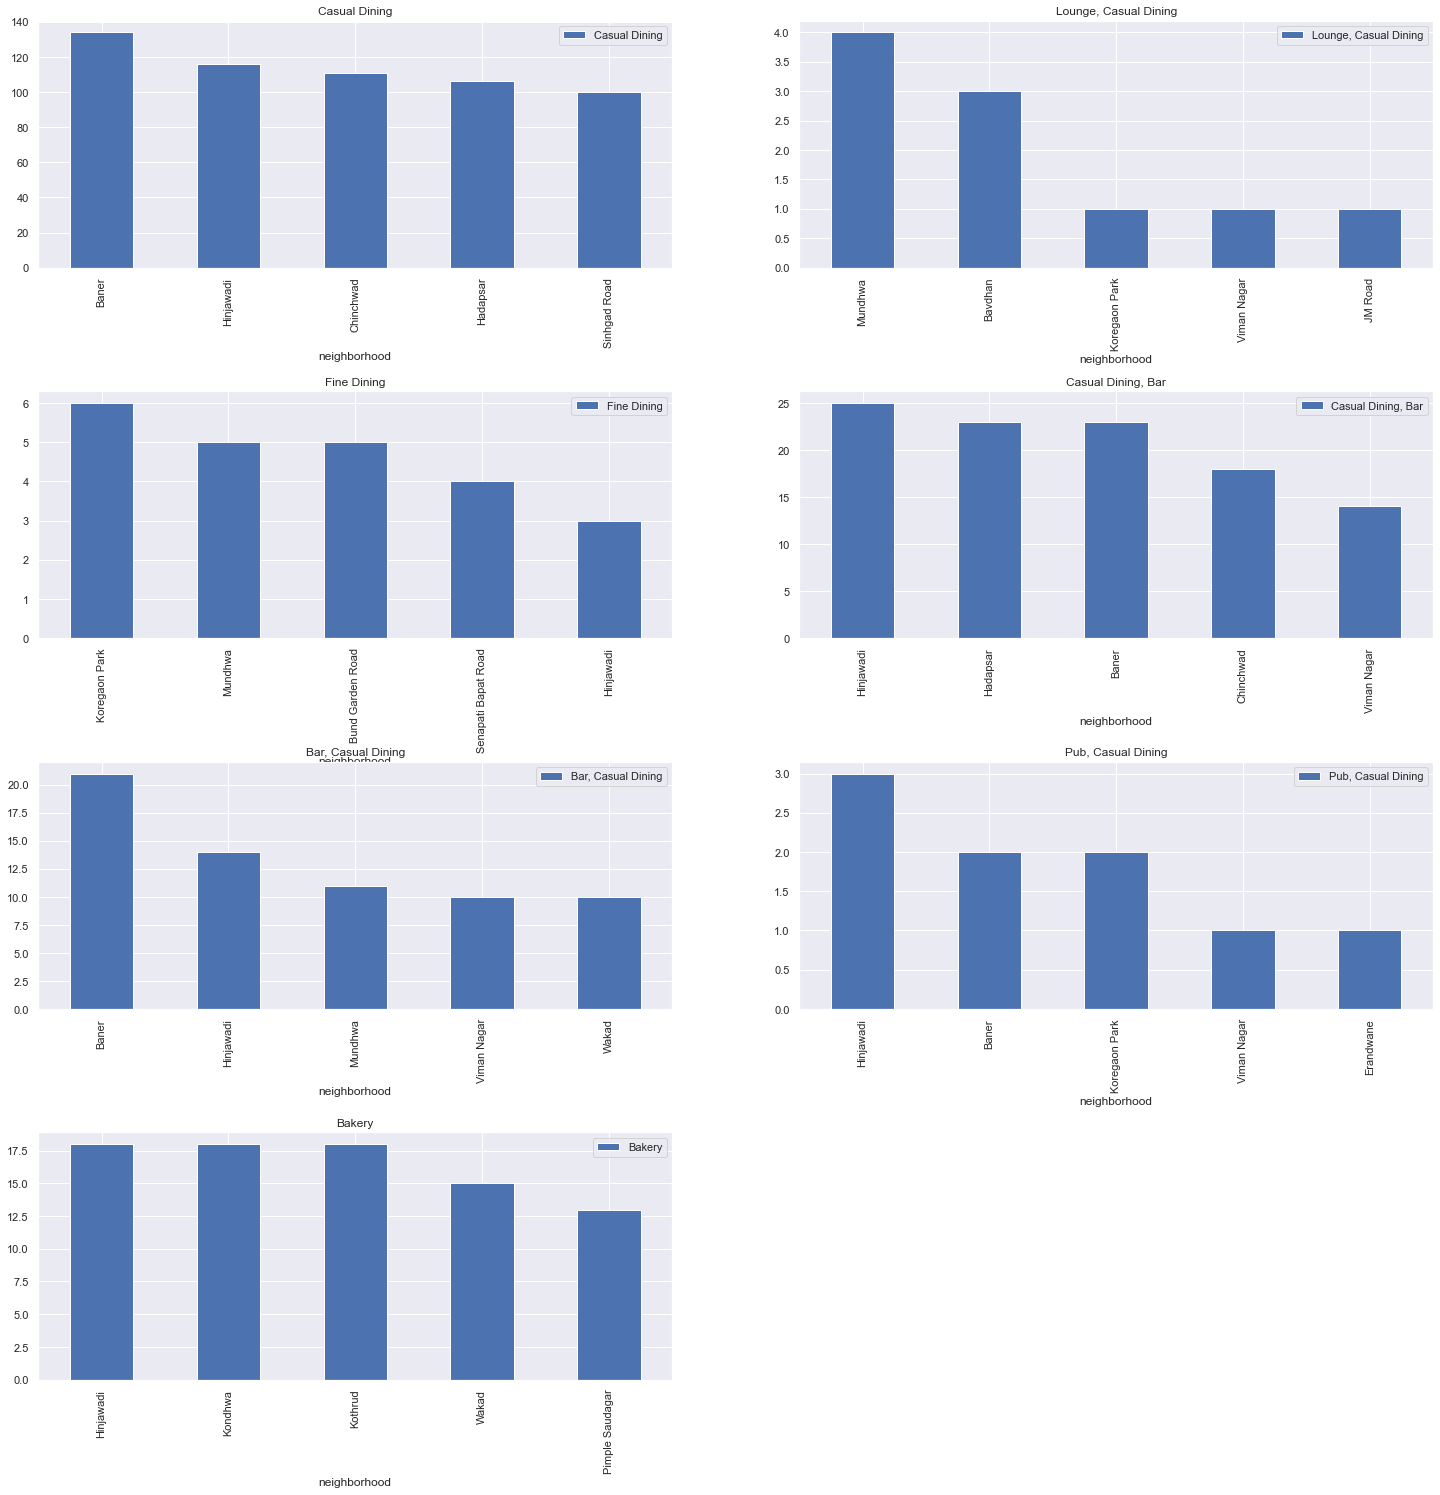

In [265]:
category = neighborhood_lst.columns
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (25,25))
fig.delaxes(ax[3,1])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
ax = ax.flatten()

for i in range(0,8):
    d= neighborhood_lst[[category[i]]].sort_values(by=category[i], ascending=False).head()
    d.plot(ax=ax[i],kind='bar')
    ax[i].set_title(category[i])
    ax[i].set_xticklabels(d.index, rotation='vertical')
    
plt.show()


Clearly Baner has most number of Pubs and bars, With Hadapsar and Sinhgad Road having the significant number of casual dining restaurant, Hinjewadi and Kothrud with high number of Bakery, SB Road and Koregaon Park with higher fine dining restaurants than others.

## Rating

#### Restaurant rating Normal Distribution

In [272]:
df['rate'] = dataset['rate']

Text(0, 0.5, 'Flights')

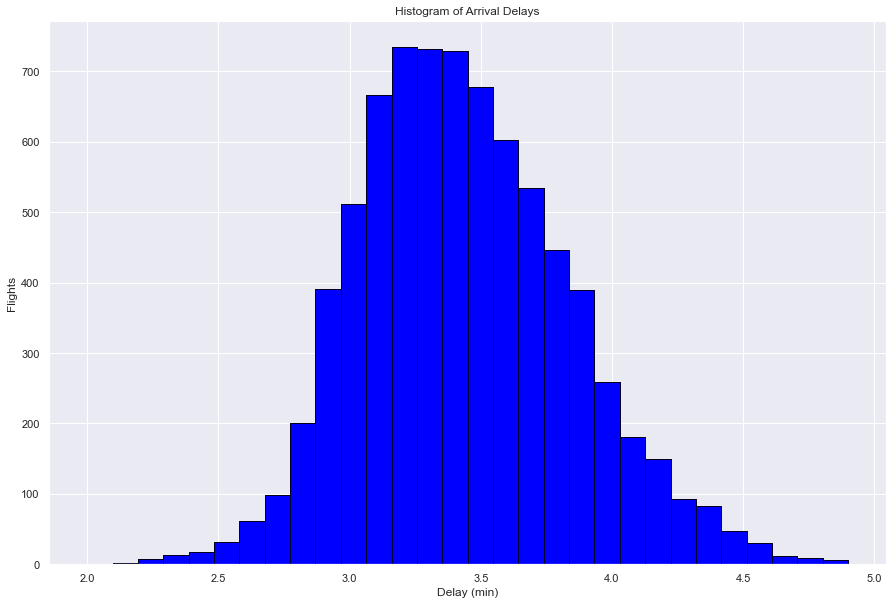

In [273]:
### Restaurant rating distibution
data = df['rate'].dropna()
# matplotlib histogram
plt.figure(figsize=(15,10))
plt.hist(data, color = 'blue', edgecolor = 'black',
         bins = 30)

# seaborn histogram
sns.distplot(data, hist=True, kde=False 
             , color = 'blue',
             bins = 30,
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In general, the rating distribution is not normal but in the highest score 3.3 has peak! We have to carefully see the condition of the highest rated restuarant

In [276]:
df[df['rate'] >= 4.8].head(n=15)

name  \
0       AB's - Absolute Barbecues   
43          Babylon Craft Brewery   
44                        Darshan   
91                     Pop Tate's   
98                    Cafe Paashh   
101                        Baobab   
114                      BarBerry   
119             Santè Spa Cuisine   
124  Chili's American Grill & Bar   
134        Level 5 Bistro and Bar   
242     Zeta - Hyatt Regency Pune   
312               Henny's Gourmet   
415           LKD | La Kheer Deli   
485                 Le Flamington   
498                          Flax   

                                              web_link               locality  \
0    https://www.zomato.com/pune/abs-absolute-barbe...              Hinjawadi   
43   https://www.zomato.com/pune/babylon-craft-brew...              Erandwane   
44           https://www.zomato.com/pune/darshan-baner                  Baner   
91   https://www.zomato.com/pune/pop-tates-viman-nagar            Viman Nagar   
98   https://www.zomato.com/pune/cafe-paashh-kalyan...          Kalyani Nagar   
101     https://www.zomato.com/pune/baobab-bund-garden       Bund Garden Road   
114       https://www.zomato.com/pune/barberry-kothrud                Kothrud   
119  https://www.zomato.com/pune/santè-spa-cuisine-...          Koregaon Park   
124  https://www.zomato.com/pune/chilis-american-gr...            Viman Nagar   
134  https://www.zomato.com/pune/level-5-bistro-and...              Erandwane   
242  https://www.zomato.com/pune/zeta-hyatt-regency...            Viman Nagar   
312   https://www.zomato.com/hennys-gourmet-food-truck  Wanowrie Kondhwa Area   
415    https://www.zomato.com/la-kheer-deli-food-truck        SB Road - Aundh   
485  https://www.zomato.com/pune/le-flamington-kaly...          Kalyani Nagar   
498     https://www.zomato.com/pune/flax-kalyani-nagar          Kalyani Nagar   

                           type  rate  votes  \
0                 Casual Dining   4.9   7029   
43                 Microbrewery   4.9      0   
44                Casual Dining   4.8   3758   
91           Bar, Casual Dining   4.9   1944   
98                         Café   4.9    378   
101          Casual Dining, Bar   4.8    350   
114          Bar, Casual Dining   4.8   1861   
119               Casual Dining   4.8   1331   
124          Casual Dining, Bar   4.9   5334   
134          Casual Dining, Bar   4.8    494   
242               Casual Dining   4.9    228   
312  Food Truck, Dessert Parlor   4.8   1070   
415  Dessert Parlor, Food Truck   4.8    741   
485                Café, Bakery   4.8    588   
498               Casual Dining   4.8    126   

                                              cuisines  avg_cost  \
0                   Continental, North Indian, Chinese    1400.0   
43   North Indian, Chinese, Continental, Mughlai, A...     900.0   
44   Italian, Continental, Chinese, Mexican, Fast F...     700.0   
91                       Continental, Italian, Chinese    1400.0   
98         Cafe, European, Healthy Food, Modern Indian    1500.0   
101                       North Indian, Italian, Asian    1200.0   
114                 North Indian, Italian, Finger Food    1200.0   
119  Salad, Continental, Healthy Food, Mediterranea...    1300.0   
124          Mexican, American, Tex-Mex, Salad, Burger    1400.0   
134                        European, Italian, American    1200.0   
242  European, Continental, Healthy Food, Italian, ...    2000.0   
312                                           Desserts     300.0   
415                                           Desserts     200.0   
485                                   Bakery, European     600.0   
498                     Healthy Food, Salad, Beverages     800.0   

                                               payment  \
0                              Cash and Cards accepted   
43                             Cash and Cards accepted   
44                Cash,Cards and Meal Coupons accepted   
91            Cash,Cards and Digital Payments acc

Most of the High rated restaurants had North Indian Cuisine in their menu, moreover we can see that all the higher rated restaurant has higher cost of food too. However location does not play much important role here, but Kalyani Nagar got some fancy restaurants!

### Price range and rating

In [277]:
# Now lets plot box plot based on the cost of food
bins = pd.IntervalIndex.from_tuples([(0, 300), (301, 500), (501, 800), (801, 1000), (1001, 1500),(1500,3000)])
df['cost_cat'] = pd.cut(df['avg_cost'], bins)

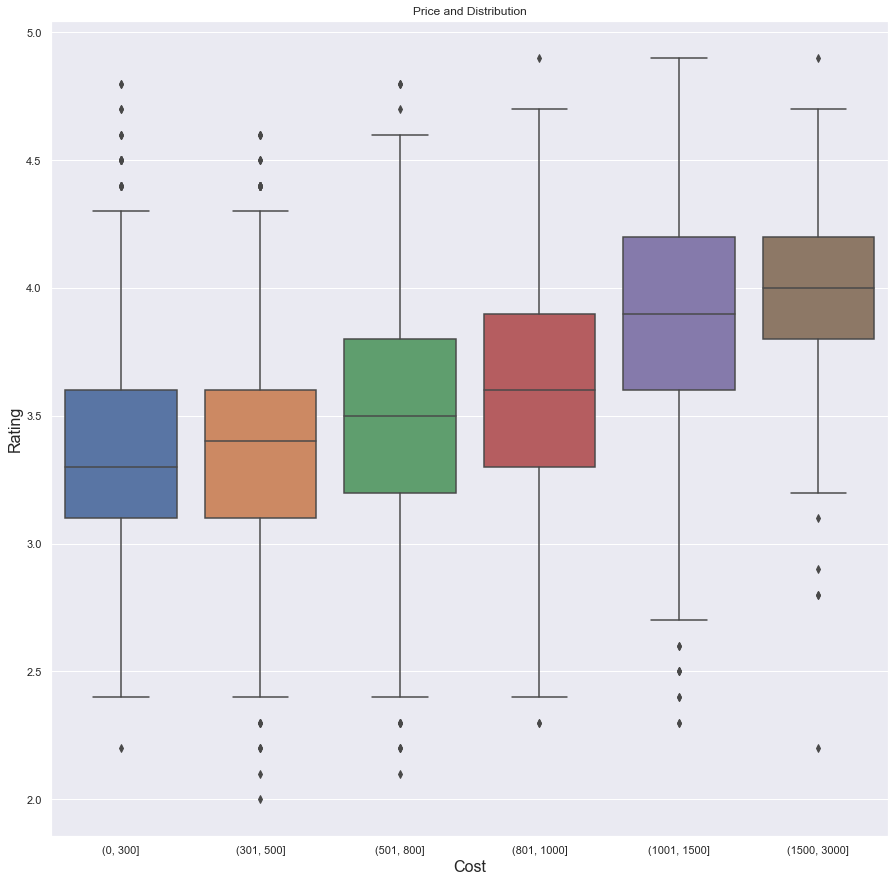

In [278]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(x="cost_cat", y="rate", data=df)
ax.set_xlabel('Cost', fontsize=16)
ax.set_ylabel('Rating', fontsize=16)
ax.set_title('Price and Distribution')
plt.savefig("box.png")
df.drop('cost_cat', axis=1, inplace=True)

It can be seen that as the price increases the average rating of restaurants also increase. So can we say Price does affect rating of a restaurant.? Not now, there may be some other factors too. lets find out

## Cuisine

#### Cuisine and rating of  a restaurant

Does having more number of cuisine mean higher rating of the restaurant?

In [280]:
def fun(x):
    if(type(x) == list):
        return (len(x))
    else:
        return 0
df['no_of_cuisine'] = df['cuisines'].str.split(',').apply(fun)


In [281]:
df.groupby(['no_of_cuisine'])['rate'].mean()

no_of_cuisine
1    3.383357
2    3.385509
3    3.451081
4    3.555529
5    3.689057
6    3.711650
7    3.801887
8    3.807692
Name: rate, dtype: float64

In [282]:
df.drop('no_of_cuisine', axis=1, inplace=True)

Yes it can be seen that retaurants having more number of cuisines are rated higher.

#### So is there a particular cuisine in a restaurant that makes the restaurant rated higher?

In [283]:
cuisine = set()
def func(x):
    if(type(x) == list):
        for y in x:
            cuisine.add(y.strip())
_ = df['cuisines'].str.split(',').apply(func)

In [284]:
cui_df = df[['name', 'locality', 'rate', 'cuisines']]
column_names = list(cuisine)
# instantiate the dataframe
cui_df = pd.concat([cui_df, pd.DataFrame(columns=column_names)], axis=1)
cui_df.loc[:, ~cui_df.columns.isin(['name', 'locality', 'rate', 'cuisines'])] = cui_df.loc[:, ~cui_df.columns.isin(['name', 'locality', 'rate', 'cuisines'])].fillna(0)
cui_df

name             locality  rate  \
0      AB's - Absolute Barbecues            Hinjawadi   4.9   
1          Cafe Co2 Resto Lounge              Bhugaon   4.6   
2      Paasha - JW Marriott Pune  Senapati Bapat Road   4.6   
3                    I Amsterdam            Hinjawadi   4.3   
4                 FC Road Social        Shivaji Nagar   4.5   
...                          ...                  ...   ...   
12184             Nil Food Point            Hinjawadi   NaN   
12185                Flirty Momo              Kharadi   NaN   
12186               Hunger Treat               Katraj   NaN   
12187               Bungalow 424              Kothrud   NaN   
12188          Desi Shakes By KB              Bavdhan   NaN   

                                                cuisines  Parsi  Arabian  \
0                     Continental, North Indian, Chinese      0        0   
1      North Indian, Chinese, Continental, Kebab, Sea...      0        0   
2                           North Indian, Kebab, Biryani      0        0   
3                Asian, European, Modern Indian, Italian      0        0   
4      North Indian, Chinese, Biryani, American, Cont...      0        0   
...                                                  ...    ...      ...   
12184                                            Chinese      0        0   
12185               Mongolian, Pizza, Chinese, Beverages      0        0   
12186                   South Indian, Fast Food, Chinese      0        0   
12187               North Indian, Fast Food, Continental      0        0   
12188                                          Beverages      0        0   

       Goan  Andhra  Bohri  German  Pizza  Malaysian  Charcoal Chicken  \
0         0       0      0       0      0          0                 0   
1         0       0      0       0      0          0                 0   
2         0       0      0       0      0          0                 0   
3         0       0      0       0      0          0                 0   
4         0       0      0       0      0          0                 0   
...     ...     ...    ...     ...    ...        ...               ...   
12184     0       0      0       0      0          0                 0   
12185     0       0      0       0      0          0                 0   
12186     0       0      0       0      0          0                 0   
12187     0       0      0       0      0          0                 0   
12188     0       0      0       0      0          0                 0   

       Continental  Sushi  Fast Food  Italian  South Indian  Biryani  \
0                0      0          0        0             0        0   
1                0      0          0        0             0        0   
2                0      0          0        0             0        0   
3                0      0          0        0             0        0   
4                0      0          0        0             0        0   
...            ...    ...        ...      ...           ...      ...   
12184            0      0          0        0             0        0   
12185            0      0          0        0             0        0   
12186            0      0          0        0             0        0   
12187            0      0          0        0             0        0   
12188            0      0          0        0             0        0   

       Gujarati  Middle Eastern  Odia  Tea  Afghan  South American  Burger  \
0             0               0     0    0       0               0       0   
1             0               0     0    0       0               0       0   
2             0               0     0    0       0               0       0   
3             0               0     0    0       0               0       0   
4             0               0     0    0       0               0       0   
...         ...             ...   ...  ...     ...             ...     ...   
12184         0               0     0    0       0        

In [285]:
for i in range(0, len(cui_df)):
    for x in cuisine:
        if type(cui_df.loc[i, 'cuisines']) == str and x in cui_df.loc[i, 'cuisines']:
            cui_df.loc[i, x] = cui_df.loc[i, x]+1
            

def set_pandas_options() -> None:
    pd.options.display.max_columns = 20
    pd.options.display.max_rows = 75
    pd.options.display.max_colwidth = 199
    pd.options.display.width = None
    # pd.options.display.precision = 2  # set as needed

set_pandas_options()

In [294]:
cui_df.groupby('rate').sum().tail(10).T.head(n=50)

rate              4.0  4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9
Parsi               1    1    0    0    1    1    0    0    0    0
Arabian             2    2    0    2    0    0    0    0    0    0
Goan                1    1    2    0    1    2    0    1    0    0
Andhra              1    1    0    0    0    0    0    0    0    0
Bohri               0    1    0    0    0    0    0    0    0    0
German              0    0    1    0    0    0    0    0    0    0
Pizza              18    5    4    3    4    3    0    4    1    0
Malaysian           0    0    1    2    2    1    1    0    0    0
Charcoal Chicken    0    0    0    1    0    0    0    0    0    0
Continental        47   37   32   28   20   15    6    4    2    4
Sushi               2    2    0    1    1    1    1    1    0    0
Fast Food          65   42   33   18   13    6    6    2    1    0
Italian            30   44   24   22   18   15    5    4    4    3
South Indian       20    8   13    4    6    1    1    0    0    0
Biryani            18   16    5    6    1    1    5    0    0    0
Gujarati            0    2    2    2    0    0    1    0    0    0
Middle Eastern      0    0    0    0    0    0    0    0    0    0
Odia                0    0    1    0    0    0    0    0    0    0
Tea                 2    0    2    2    1    0    0    0    0    0
Afghan              1    1    0    0    0    0    0    0    0    0
South American      0    0    0    0    0    0    0    0    0    0
Burger             10    3    2    1    4    1    1    0    0    1
Hot dogs            0    0    0    0    0    0    0    0    0    0
Hyderabadi          0    0    0    0    0    0    0    0    0    0
Awadhi              0    1    0    0    0    0    0    0    0    0
Spanish             0    0    0    0    0    0    0    0    0    0
Roast Chicken       0    0    0    0    0    0    0    0    0    0
Desserts           27   28   17   20   23    6    5    3    3    0
Turkish             0    1    1    0    0    0    0    0    0    0
Greek               1    0    0    0    0    0    0    0    0    0
European            7    7    8    7   12    4    4    1    2    2
Mangalorean         1    1    2    0    1    0    1    0    0    0
Assamese            0    0    0    0    0    0    0    0    0    0
Malwani             8    1    4    2    1    0    0    0    0    0
Rolls               6    3    1    0    1    0    0    0    0    0
Korean              1    1    0    0    1    1    1    0    0    0
Juices              1    2    1    1    1    1    0    0    0    0
Bihari              0    0    0    0    0    0    0    0    0    0
Mediterranean       1    2    4    2    3    0    1    0    1    0
Momos               5    3    2    2    3    1    0    0    0    0
Ice Cream          11    6    7    2    3    2    1    1    0    0
Cantonese           0    0    0    0    0    0    1    0    0    0
Cafe               18   15   16    7   13    5    1    0    0    1
Kebab               5    6    1    2    1    2    2    0    0    0
Asian              19   17   15   14   15   11    6    3    1    1
North Eastern       0    0    1    0    0    0    0    0    0    0
American            5    3    3    1    4    3    2    0    1    1
Mughlai            22   17   10    5    5    5    5    0    0    1
Beverages          38   25   24   10    8    4    3    1    1    2
Kerala              2    0    0    0    1    0    1    0    0    0

After analysing the data it was found that Goan, Biryani, Chinese, Continental, European, Desserts, Italian, Asian, Beverages were the top rated cuisines but it is quite obvious for such type of restaurant to be at the top.

### Lets find out which neighborhood is famous for what type of cuisine

In [296]:
# Now can we say whcih neighborhood is famous for what type of food or cuisine
cuisine_grouped = cui_df.groupby('locality').sum()
cuisine_grouped

rate  Parsi  Arabian  Goan  Andhra  Bohri  German  \
locality                                                                     
Akurdi                  251.4      0        0     1       0      0       0   
Around Pune               3.9      0        0     0       0      0       0   
Aundh                   524.1      0        0     1       0      0       0   
B.T. Kawade Road         51.9      0        0     0       0      0       0   
Balewadi                295.5      0        0     0       0      0       0   
...                       ...    ...      ...   ...     ...    ...     ...   
Wakad                  1167.4      0        2     1       0      0       0   
Wanowrie                220.4      0        0     0       0      0       0   
Wanowrie Kondhwa Area    98.6      0        0     0       0      0       0   
Warje                   169.1      0        0     1       0      0       0   
Yerawada                201.0      0        0     0       0      0       0   

                       Pizza  Malaysian  Charcoal Chicken  ...  Burmese  \
locality                                                   ...            
Akurdi                     1          0                 0  ...        0   
Around Pune                1          0                 0  ...        0   
Aundh                      3          0                 0  ...        0   
B.T. Kawade Road           0          0                 0  ...        0   
Balewadi                   3          0                 0  ...        0   
...                      ...        ...               ...  ...      ...   
Wakad                      9          0                 0  ...        0   
Wanowrie                   2          0                 0  ...        0   
Wanowrie Kondhwa Area      0          0                 0  ...        0   
Warje                      0          1                 0  ...        0   
Yerawada                   0          0                 0  ...        0   

                       Ethiopian  Tex-Mex  Bengali  Sandwich  Frozen Yogurt  \
locality                                                                      
Akurdi                         0        0        0         2              0   
Around Pune                    0        0        0         0              0   
Aundh                          0        0        1         2              1   
B.T. Kawade Road               0        0        0         0              0   
Balewadi                       0        0        0         3              0   
...                          ...      ...      ...       ...            ...   
Wakad                          0        0        4        15              0   
Wanowrie                       0        0        0         0              0   
Wanowrie Kondhwa Area          0        0        0         0              0   
Warje                          0        0        0         2              0   
Yerawada                       0        0        0         1              0   

                       Lebanese  Brazilian  Konkan  Sindhi  
locality                                                    
Akurdi                        1          0       0       0  
Around Pune                   0          0       0       0  
Aundh                         2          0       0       0  
B.T. Kawade Road              0          0       0       0  
Balewadi                      1          0       0       0  
...                         ...        ...     ...     ...  
Wakad                         9          0       1       0  
Wanowrie                      0          0       0       1  
Wanowrie Kondhwa Area         0          0       0       0  
Warje                         0          0       0       0  
Yerawada                      0          0       0       0  

[99 rows x 100 columns]

### Lets print the top 5 cuisine famous in each of the locality

In [297]:
num_top_venues = 5
for hood in cuisine_grouped.index:
    print("----"+hood+"----")
    temp = cuisine_grouped[cuisine_grouped.index == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Akurdi----
           venue  freq
0         Indian  51.0
1   North Indian  49.0
2        Chinese  38.0
3      Fast Food  20.0
4  Maharashtrian  19.0


----Around Pune----
          venue  freq
0     Beverages   2.0
1  North Indian   1.0
2         Pizza   1.0
3       Chinese   1.0
4   Street Food   1.0


----Aundh----
          venue   freq
0        Indian  110.0
1  North Indian  104.0
2       Chinese   57.0
3     Fast Food   54.0
4   Street Food   22.0


----B.T. Kawade Road----
          venue  freq
0        Indian  14.0
1  North Indian  13.0
2       Chinese  10.0
3  South Indian   5.0
4      Desserts   3.0


----Balewadi----
          venue  freq
0        Indian  61.0
1  North Indian  58.0
2       Chinese  38.0
3     Fast Food  24.0
4       Biryani  17.0


----Baner----
          venue   freq
0        Indian  217.0
1  North Indian  198.0
2       Chinese  131.0
3     Fast Food   86.0
4       Italian   46.0


----Bavdhan----
           venue  freq
0         Indian  94.0
1   North I

4       Biryani   2.0


----Mahalunge----
          venue  freq
0        Indian   6.0
1  North Indian   5.0
2       Chinese   5.0
3  South Indian   2.0
4     Fast Food   1.0


----Model Colony----
          venue  freq
0  North Indian  18.0
1        Indian  18.0
2     Fast Food  16.0
3       Chinese  14.0
4         Salad   4.0


----Mulshi Road----
           venue  freq
0         Indian  34.0
1   North Indian  33.0
2        Chinese  26.0
3  Maharashtrian  13.0
4      Fast Food   6.0


----Mundhwa----
          venue  freq
0        Indian  80.0
1  North Indian  75.0
2       Chinese  45.0
3   Continental  22.0
4     Fast Food  22.0


----NIBM Road----
          venue  freq
0        Indian  76.0
1  North Indian  75.0
2       Chinese  61.0
3     Fast Food  52.0
4     Beverages  19.0


----Narhe----
           venue  freq
0         Indian  93.0
1   North Indian  86.0
2        Chinese  63.0
3      Fast Food  46.0
4  Maharashtrian  35.0


----Nigdi----
          venue  freq
0        Indian  

### Cuisine popular in Pune

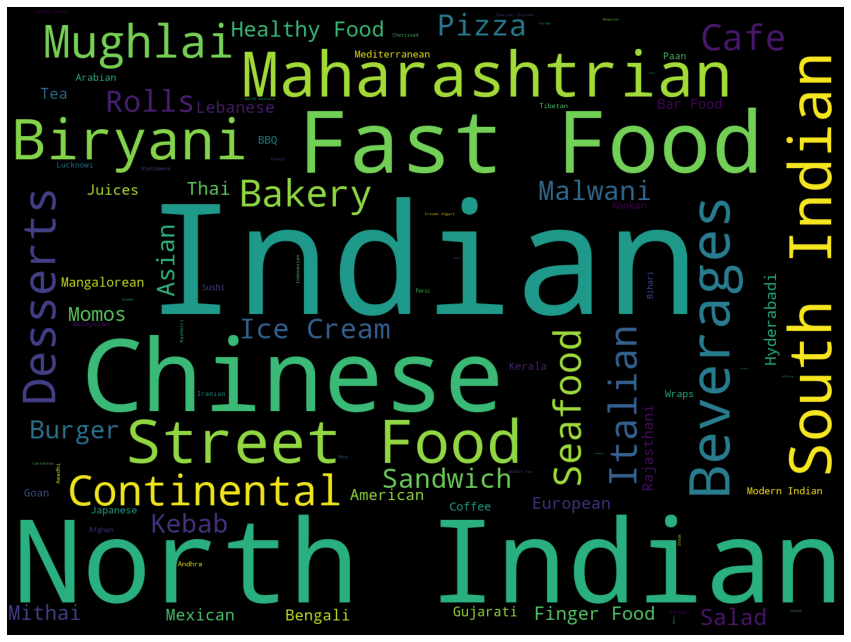

In [298]:
from subprocess import check_output
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(cuisine_grouped.iloc[:,1:].sum()))

fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Rating and Cuisine

#### Is there any cuisine which is always rated high?

In [299]:
cui_df
# Now lets plot box plot based on the cost of food
bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)])
cui_df['rate_cat'] = pd.cut(cui_df['rate'], bins)
cui_df['rate_cat'] = cui_df['rate_cat'].astype(str)
cui_df['rate_cat'] = cui_df['rate_cat'].map({'(0.0, 1.0]' : 1, '(1.0, 2.0]' : 2, '(2.0, 3.0]' : 3, '(3.0, 4.0]' : 4, '(4.0, 5.0]' : 5 })

In [300]:
ra_cu = cui_df.groupby(['rate_cat']).sum()
ra_cu

rate  Parsi  Arabian  Goan  Andhra  Bohri  German  Pizza  \
rate_cat                                                                
2.0           2.0      0        0     0       0      0       0      0   
3.0        3820.1      0        4     1       1      0       1     32   
4.0       20071.8      3       14    13       8      0       0    150   
5.0        2611.4      3        4     7       1      1       1     24   

          Malaysian  Charcoal Chicken  ...  Burmese  Ethiopian  Tex-Mex  \
rate_cat                               ...                                
2.0               0                 0  ...        0          0        0   
3.0               0                 2  ...        0          0        0   
4.0               4                 1  ...        0          0        0   
5.0               7                 1  ...        0          1        2   

          Bengali  Sandwich  Frozen Yogurt  Lebanese  Brazilian  Konkan  \
rate_cat                                                                  
2.0             0         0              0         0          0       0   
3.0             6        16              1        14          0       1   
4.0            45        91              0        46          0      17   
5.0             3        14              2         2          1       3   

          Sindhi  
rate_cat          
2.0            0  
3.0            0  
4.0            2  
5.0            0  

[4 rows x 100 columns]

----2.0----
        cuisine  freq
0  North Indian   1.0
1       Chinese   1.0
2        Indian   1.0
3         Parsi   0.0
4        Mithai   0.0


----3.0----
        cuisine   freq
0        Indian  823.0
1  North Indian  781.0
2       Chinese  646.0
3     Fast Food  313.0
4  South Indian  168.0


----4.0----
         cuisine    freq
0         Indian  3099.0
1   North Indian  2909.0
2        Chinese  2175.0
3      Fast Food  1458.0
4  Maharashtrian   614.0


----5.0----
        cuisine   freq
0        Indian  289.0
1  North Indian  262.0
2   Continental  148.0
3       Italian  139.0
4       Chinese  136.0




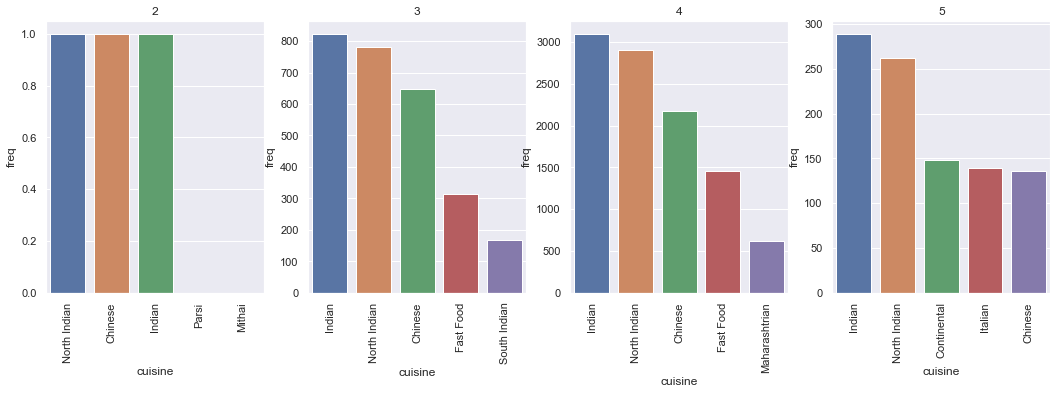

In [301]:
num_top_venues = 5
f, ax = plt.subplots(1,4, figsize = (18,5))
i = 2
for hood in ra_cu.index:
    print("----"+str(hood)+"----")
    temp = ra_cu[ra_cu.index == hood].T.reset_index()
    temp.columns = ['cuisine','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    sns.barplot(y = 'freq', x = 'cuisine', data = temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues), ax = ax[i-2],)
    ax[i-2].set_title(str(i))
    ax[i-2].set_xticklabels(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues).cuisine, rotation='vertical')
    i+=1
plt.show()

Indian, North Indian, Chinese tough were common among the ratings but Most of the continental Cuisine restaurant were rated high which was also evident from the data.

# Statistical Analysis

In [302]:
import statsmodels.formula.api as smf

### Are ratings affected by how cheap/expensive a restaurant is ?

In [309]:
data = [
    go.Scatter(x = df['avg_cost'],
              y = df['rate'],
              mode = "markers",
               text = df['name'],
               marker = dict(opacity = 0.7,
                            size = 10,
                            color = df['rate'], #Set color equalivant to rating
                            colorscale= 'Viridis',
                            showscale=True,
                             maxdisplayed=2500,
                            ),
                hoverinfo="text+x+y",
              )
]
layout = go.Layout(autosize=True,
                   xaxis=dict(title="Average Cost of Two (INR)",
                             #titlefont=dict(size=20,),
                             #tickmode="linear",
                             ),
                   yaxis=dict(title="Rating",
                             #titlefont=dict(size=17,),
                             ),
                  )
iplot(dict(data=data, layout=layout))

As it seems, from a quick glance, there is no obseravable linear relationship. At almost every price point, there appears to be both Good and Bad restaurants.

Not lets carry out statistical analysis pearson correlation on it.

Null Hypothesis : There is no relationship between the rating and price of the restaurant

Alternate Hypothesis : There is some relationship between the two

In [310]:
pear = df.dropna(subset=['avg_cost', 'rate'])

In [311]:
from scipy import stats 
pearson_coef, p_value = stats.pearsonr(pear['avg_cost'], pear['rate']) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results

Pearson Correlation Coefficient:  0.05460761234416199 and a P-value of: 1.5999089660503456e-06


The p-values comes out to be much much lower than our signifiance level. Therefore we can say that there is some relationship between the two.

### Now Lets see the top venues of each area of Pune

In [317]:
import requests
from pandas.io.json import json_normalize

In [318]:
CLIENT_ID = 'WPTSXRBGDLUULN1OWDRCQUAE3KIEDUNMQM5AW5Q0DH5UCCAY' # your Foursquare ID
CLIENT_SECRET = 'TR4030IUWOWEHNIZCT0EQGVC2BMLZV35KSHH404AAWSMFXAU' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
radius = 9999

In [319]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [320]:
neigh_lat_lon = df.groupby(['locality'])['location_latitude', 'location_longitude'].first()
neigh_lat_lon

<ipython-input-320-5fc28650f3e0>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



location_latitude  location_longitude
locality                                                    
Akurdi                         18.648600           73.764736
Around Pune                    18.553316           73.807092
Aundh                          18.561883           73.810196
B.T. Kawade Road                0.000000            0.000000
Balewadi                       18.582027           73.768983
...                                  ...                 ...
Wakad                          18.602249           73.764445
Wanowrie                       18.488368           73.898667
Wanowrie Kondhwa Area           0.000000            0.000000
Warje                          18.482044           73.800170
Yerawada                       18.565632           73.886576

[99 rows x 2 columns]

In [321]:
column_names = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5']
# instantiate the dataframe
dfa = pd.DataFrame(columns=column_names)
dfa

Empty DataFrame
Columns: [cat1, cat2, cat3, cat4, cat5]
Index: []

In [322]:
i=0
for lat, long in zip(neigh_lat_lon.location_latitude, neigh_lat_lon.location_longitude):
    latitude = lat
    longitude = long
    # define URL
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
    # send GET request and get trending venues
    results = requests.get(url).json()
    items = results['response']['groups'][0]['items']
    
    dataframe = json_normalize(items) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # filter the category for each row
    dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean columns
    dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

    print(neigh_lat_lon.index[i], " : ",dataframe_filtered.head(5)['categories'])
    dfa.loc[neigh_lat_lon.index[i]] = dataframe_filtered.head(5)['categories'].tolist()
    i+=1

<ipython-input-322-095e61501201>:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



Akurdi  :  0                       Bakery
1                  Coffee Shop
2    Middle Eastern Restaurant
3           Italian Restaurant
4         Fast Food Restaurant
Name: categories, dtype: object
Around Pune  :  0           Bookstore
1         Coffee Shop
2               Hotel
3    Asian Restaurant
4      Ice Cream Shop
Name: categories, dtype: object
Aundh  :  0           Bookstore
1         Coffee Shop
2      Ice Cream Shop
3               Hotel
4    Asian Restaurant
Name: categories, dtype: object


KeyError: 'groups'

In [323]:
dfa

cat1         cat2                       cat3  \
Akurdi          Bakery  Coffee Shop  Middle Eastern Restaurant   
Around Pune  Bookstore  Coffee Shop                      Hotel   
Aundh        Bookstore  Coffee Shop             Ice Cream Shop   

                           cat4                  cat5  
Akurdi       Italian Restaurant  Fast Food Restaurant  
Around Pune    Asian Restaurant        Ice Cream Shop  
Aundh                     Hotel      Asian Restaurant